In [0]:
# # Seed value
# # Apparently you may use different seed values at each stage
# seed_value= 0

# # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(seed_value)

# # 2. Set the `python` built-in pseudo-random generator at a fixed value
# import random
# random.seed(seed_value)

# # 3. Set the `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
# import tensorflow as tf
# tf.random.set_seed(seed_value)

#2021-02-16 20:29:59
#D02182021-T201806/ is super short training

In [0]:
%fs
ls /FileStore/models/D03012021-T173721/

path name size dbfs:/FileStore/models/D03012021-T173721/best_model.h5 best_model.h5 16008832 dbfs:/FileStore/models/D03012021-T173721/full_loss.pkl full_loss.pkl 1158 dbfs:/FileStore/models/D03012021-T173721/full_vloss.pkl full_vloss.pkl 1158 dbfs:/FileStore/models/D03012021-T173721/fullbooster_noshift_e25_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D03012021-T173721_kfold4__final.h5 fullbooster_noshift_e25_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D03012021-T173721_kfold4__final.h5 16008832

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
#import prettyprint
print(tf.__version__)
#tf.compat.v1.disable_eager_execution()

# i have 2.4.1, malachi had 2.1.0 but reverting back didn't help
#try 2.3.1 for keras
#and need h5py==2.10.0

2.1.0

In [0]:
%run ./models

2.1.0

In [0]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16

In [0]:
#for now, we don't need to work with all data
df = spark.read.format("csv").option("header", "true").load("/FileStore/tables/data_release.csv")
display(df)

time file B:ACMNIG B:ACMNPG B:ACMXIG B:ACMXPG B:DCIG B:DCPG B:GMPS4V B:GMPSBT B:GMPSFF B:IMAXXG B:IMAXXO B:IMINER B:IMINST B:IMINXG B:IMINXO B:IPHSTC B:LINFRQ B:NGMPS B:VIMAX B:VIMIN B:VINHBT B:VIPHAS B_ACMNIG B_ACMNPG B_ACMXIG B_ACMXPG B_DCIG B_DCPG B_GMPSBT B_GMPSFF B_IMAXXG B_IMAXXO B_IMINST B_IMINXG B_IMINXO B_IPHSTC B_VIMAX B_VIMIN B_VINHBT B_VIPHAS I:IB I:MDAT40 I:MXIB 2020-03-10T05:00:00.081Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 136.13451113 3.0E-4 3.2042 -117.88400269 10.0 0.1346875 0.0 -11.82499981 0.0 20.0 26.11790771 4.0 966.08349609 103.37957001 1.0 1.81169987 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 3.0E-4 3.2042 -117.88400269 10.0 0.0 -11.82499981 0.0 20.0 966.1050415 103.39315796 1.0 1.80999994 7055.9375 7033.23361377 7033.41064453 2020-03-10T05:00:00.148Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 123.13449813 3.0E-4 3.2042 -117.88400269 10.0 -0.2703125 0.0 -11.82499981 0.0 20.0 26.06334229 4.0 966.07373047 103.4212265 1.0 1.81246901 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 3.0E-4 3.2042 -117.88400269 10.0 0.0 -11.82499981 0.0 20.0 966.1050415 103.39315796 1.0 1.80999994 7017.1875 6261.59665404 6250.28417969 2020-03-10T05:00:00.215Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 119.23449423 3.0E-4 3.2042 -117.88400269 10.0 -0.3053125 0.0 -11.82499981 0.0 20.0 26.00877686 4.0 966.03771973 103.42545319 1.0 1.81087375 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 3.0E-4 3.2042 -117.88400269 10.0 0.0 -11.82499981 0.0 20.0 966.1050415 103.39315796 1.0 1.80999994 6344.6875 5105.5907994 5093.85107422 2020-03-10T05:00:00.281Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 142.95951796 3.0E-4 3.2042 -117.88400269 10.0 -0.2603125 0.0 -11.82499981 0.0 20.0 26.08153076 4.0 966.05407715 103.42035675 1.0 1.81242967 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 3.0E-4 3.2042 -117.88400269 10.0 0.0 -11.82499981 0.0 20.0 966.1050415 103.39315796 1.0 1.80999994 5192.1875 3989.56297194 3978.28979492 2020-03-10T05:00:00.348Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 133.53450853 3.0E-4 3.2042 -117.88400269 10.0 -0.1853125 0.0 -11.82499981 0.0 20.0 26.2088501 4.0 966.03118896 103.41226959 1.0 1.81319046 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 3.0E-4 3.2042 -117.88400269 10.0 0.0 -11.82499981 0.0 20.0 966.1050415 103.39315796 1.0 1.80999994 4064.6875 2907.40965606 2896.43261719 2020-03-10T05:00:00.415Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 94.53446953 3.0E-4 3.2042 -117.88400269 10.0 -0.0953125 0.0 -11.82499981 0.0 20.0 26.2088501 4.0 966.06384277 103.40330505 1.0 1.81311011 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 3.0E-4 3.2042 -117.88400269 10.0 0.0 -11.82499981 0.0 20.0 966.1050415 103.39315796 1.0 1.80999994 2980.9375 1855.77391818 1845.13244629 2020-03-10T05:00:00.481Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 41.88441688 3.0E-4 3.2042 -117.88400269 10.0 -0.0303125 0.0 -11.82499981 0.0 20.0 26.27705688 4.0 966.10638428 103.39666748 1.0 1.81297755 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 3.0E-4 3.2042 -117.88400269 10.0 0.0 -11.82499981 0.0 20.0 966.1050415 103.39315796 1.0 1.80999994 1924.6875 833.74023096 823.32458496 2020-03-10T05:00:00.548Z MLParamData_1583906408.4261804_From_MLrn_2020-03-10 00:00:00_to_2020-03-11 00:00:00.h5 0.75350088 10.00000572 0.30000001 3.0 0.0 0.0 94.53446953 3.0E-4 3.2042 -117.88400269 10.0 -0.1403125 0.0 -11.82499981 0.0 20.0 26.27705688 4.0 966.0474

In [0]:
our_data = df.toPandas()
our_data

time 
 file 
 B:ACMNIG 
 B:ACMNPG 
 B:ACMXIG 
 B:ACMXPG 
 B:DCIG 
 B:DCPG 
 B:GMPS4V 
 B:GMPSBT 
 B:GMPSFF 
 B:IMAXXG 
 B:IMAXXO 
 B:IMINER 
 B:IMINST 
 B:IMINXG 
 B:IMINXO 
 B:IPHSTC 
 B:LINFRQ 
 B:NGMPS 
 B:VIMAX 
 B:VIMIN 
 B:VINHBT 
 B:VIPHAS 
 B_ACMNIG 
 B_ACMNPG 
 B_ACMXIG 
 B_ACMXPG 
 B_DCIG 
 B_DCPG 
 B_GMPSBT 
 B_GMPSFF 
 B_IMAXXG 
 B_IMAXXO 
 B_IMINST 
 B_IMINXG 
 B_IMINXO 
 B_IPHSTC 
 B_VIMAX 
 B_VIMIN 
 B_VINHBT 
 B_VIPHAS 
 I:IB 
 I:MDAT40 
 I:MXIB 
 
 
 
 
 0 
 2020-03-10T05:00:00.081Z 
 MLParamData_1583906408.4261804_From_MLrn_2020-... 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 136.13451113 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.1346875 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 26.11790771 
 4.0 
 966.08349609 
 103.37957001 
 1.0 
 1.81169987 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 966.1050415 
 103.39315796 
 1.0 
 1.80999994 
 7055.9375 
 7033.23361377 
 7033.41064453 
 
 
 1 
 2020-03-10T05:00:00.148Z 
 MLParamData_1583906408.4261804_From_MLrn_2020-... 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 123.13449813 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 -0.2703125 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 26.06334229 
 4.0 
 966.07373047 
 103.4212265 
 1.0 
 1.81246901 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 966.1050415 
 103.39315796 
 1.0 
 1.80999994 
 7017.1875 
 6261.59665404 
 6250.28417969 
 
 
 2 
 2020-03-10T05:00:00.215Z 
 MLParamData_1583906408.4261804_From_MLrn_2020-... 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 119.23449423 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 -0.3053125 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 26.00877686 
 4.0 
 966.03771973 
 103.42545319 
 1.0 
 1.81087375 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 966.1050415 
 103.39315796 
 1.0 
 1.80999994 
 6344.6875 
 5105.5907994 
 5093.85107422 
 
 
 3 
 2020-03-10T05:00:00.281Z 
 MLParamData_1583906408.4261804_From_MLrn_2020-... 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 142.95951796 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 -0.2603125 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 26.08153076 
 4.0 
 966.05407715 
 103.42035675 
 1.0 
 1.81242967 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 966.1050415 
 103.39315796 
 1.0 
 1.80999994 
 5192.1875 
 3989.56297194 
 3978.28979492 
 
 
 4 
 2020-03-10T05:00:00.348Z 
 MLParamData_1583906408.4261804_From_MLrn_2020-... 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 133.53450853 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 -0.1853125 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 26.2088501 
 4.0 
 966.03118896 
 103.41226959 
 1.0 
 1.81319046 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 966.1050415 
 103.39315796 
 1.0 
 1.80999994 
 4064.6875 
 2907.40965606 
 2896.43261719 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1295708 
 2020-03-11T04:59:59.703Z 
 MLParamData_1583906408.4261804_From_MLrn_2020-... 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 105.25948026 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.1746875 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 -4.57514648 
 4.0 
 966.04425049 
 103.40161896 
 1.0 
 1.80724561 
 0.75350088 
 10.00000572 
 0.30000001 
 3.0 
 0.0 
 0.0 
 3.0E-4 
 3.2042 
 -117.88400269 
 10.0 
 0.0 
 -11.82499981 
 0.0 
 20.0 
 966.08502197 
 103.41963959 
 1.0 
 1.80999994 
 4063.4375 
 2907.40965606 
 2896.37744

In [0]:
#import dataprep.dataset as dp
# def load_reformated_cvs(filename,nrows=100000):
#     df = pd.read_csv(filename,nrows=nrows)
#     df=df.replace([np.inf, -np.inf], np.nan)
#     df=df.dropna(axis=0)
#     return df
#filename='310_11_more_params.csv'#final_310_311_data.csv'

nsteps=250000
#df = dp.load_reformated_cvs('../data/'+filename,nrows=nsteps)

df = our_data.head(nsteps)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(axis=0)

df = df.set_index(pd.to_datetime(df.time))
df = df.dropna()
df = df.drop_duplicates()
print(len(df))
print(df.keys())

250000
Index(['time', 'file', 'B:ACMNIG', 'B:ACMNPG', 'B:ACMXIG', 'B:ACMXPG',
 'B:DCIG', 'B:DCPG', 'B:GMPS4V', 'B:GMPSBT', 'B:GMPSFF', 'B:IMAXXG',
 'B:IMAXXO', 'B:IMINER', 'B:IMINST', 'B:IMINXG', 'B:IMINXO', 'B:IPHSTC',
 'B:LINFRQ', 'B:NGMPS', 'B:VIMAX', 'B:VIMIN', 'B:VINHBT', 'B:VIPHAS',
 'B_ACMNIG', 'B_ACMNPG', 'B_ACMXIG', 'B_ACMXPG', 'B_DCIG', 'B_DCPG',
 'B_GMPSBT', 'B_GMPSFF', 'B_IMAXXG', 'B_IMAXXO', 'B_IMINST', 'B_IMINXG',
 'B_IMINXO', 'B_IPHSTC', 'B_VIMAX', 'B_VIMIN', 'B_VINHBT', 'B_VIPHAS',
 'I:IB', 'I:MDAT40', 'I:MXIB'],
 dtype='object')

In [0]:
scale_dict = {}

for var in ['B:VIMIN', 'B:IMINER', 'B_VIMIN', 'B:LINFRQ', 'I:IB', 'I:MDAT40']:
  our_data2 = df
  trace = our_data2[var].astype('float32')
  data = np.array(trace)
  print(data)
  median = np.median(data)
  upper_quartile = np.percentile(data, 75)
  lower_quartile = np.percentile(data, 25)
  #print(median, upper_quartile, lower_quartile)
  iqr = upper_quartile - lower_quartile
  lower_whisker = data[data>=lower_quartile-1.5*iqr].min()
  upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
  print(f'Variable {var} with upper {upper_whisker} and lower {lower_whisker}')
  
  ranged = upper_whisker - lower_whisker
  #(value − median) / (upper - lower)
  our_data2[var] = 1/ranged*(data - median)
  
  scale_dict[str(var)] = {"median": median, "range": ranged}
print(scale_dict)

[103.37957 103.42123 103.42545 ... 103.43027 103.4262 103.423546]
Variable B:VIMIN with upper 103.45585632324219 and lower 103.33849334716797
[ 0.1346875 -0.2703125 -0.3053125 ... -0.2053125 -0.2553125 -0.2103125]
Variable B:IMINER with upper 0.5196874737739563 and lower -0.520312488079071
[103.39316 103.39316 103.39316 ... 103.40417 103.40417 103.40417]
Variable B_VIMIN with upper 103.40166473388672 and lower 103.39315795898438
[26.117908 26.063343 26.008778 ... 14.722827 14.659167 14.536395]
Variable B:LINFRQ with upper 37.33110427856445 and lower -31.444072723388672
[7055.9375 7017.1875 6344.6875 ... 4503.4375 4503.4375 6374.6875]
Variable I:IB with upper 7060.9375 and lower 345.9375
[7033.2334 6261.5967 5105.591 ... 4543.9146 5478.821 6403.656 ]
Variable I:MDAT40 with upper 7033.38623046875 and lower 369.415283203125
{'B:VIMIN': {'median': 103.39773, 'range': 0.117362976}, 'B:IMINER': {'median': -0.0003125, 'range': 1.04}, 'B_VIMIN': {'median': 103.39916, 'range': 0.008506775}, 'B:LINFRQ': {'median': 7.433795, 'range': 68.77518}, 'I:IB': {'median': 2975.9375, 'range': 6715.0}, 'I:MDAT40': {'median': 2907.4097, 'range': 6663.9707}}

In [0]:
#need this for all the plotting functions

def unscale(var_name, tseries, scale_dict):
  from_model = np.asarray(tseries)
  update = from_model*scale_dict[str(var_name)]["range"] + scale_dict[str(var_name)]["median"]
  return(update)

In [0]:
unscale("B:IMINER", ["B:IMINER"], scale_dict)

Out[24]: array([ 0.1346875, -0.2703125, -0.3053125, ..., -0.2053125, -0.2553125,
 -0.2103125], dtype=float32)

In [0]:
# our_data['B:VIMIN'] = our_data['B:VIMIN'].shift(-1) #df['B:VIMIN'] = df['B:VIMIN'].shift(-1)
# our_data = our_data.replace([np.inf, -np.inf], np.nan)
# our_data = our_data.dropna(axis=0)

new_scaling = our_data2[['B:VIMIN', 'B:IMINER', 'B_VIMIN', 'B:LINFRQ', 'I:IB', 'I:MDAT40']]
new_scaling['B:VIMIN'] = new_scaling['B:VIMIN'].shift(-1)

In [0]:
print(our_data['B:IMINER'])
print(unscale('B:IMINER', new_scaling['B:IMINER'], scale_dict))

0 0.1346875
1 -0.2703125
2 -0.3053125
3 -0.2603125
4 -0.1853125
 ... 
1295708 0.1746875
1295709 0.0946875
1295710 0.0146875
1295711 -0.0203125
1295712 -0.0653125
Name: B:IMINER, Length: 1295713, dtype: object
[ 0.1346875 -0.2703125 -0.3053125 ... -0.2053125 -0.2553125 -0.2103125]

In [0]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, RobustScaler

## 1 second (cycle - 15Hz)
look_back    = 1*15 #1 second! 15, 45, 75
look_forward = 1 
    
def create_dataset(dataset, look_back=1,look_forward=1):
    X, Y = [], []
    offset = look_back+look_forward
    for i in range(len(dataset)-(offset+1)):
        xx = dataset[i:(i+look_back), 0]
        yy = dataset[(i + look_back):(i + offset), 0]
        X.append(xx)
        Y.append(yy)
    return np.array(X), np.array(Y)

def get_dataset(data, variable='B:VIMIN'):
    df = data
    dataset = df[variable].values #numpy.ndarray
    dataset = dataset.astype('float32')
    dataset = np.reshape(dataset, (-1, 1))
#     scaler = MinMaxScaler(feature_range=(0, 1))
    #scaler = RobustScaler()
#     dataset = scaler.fit_transform(dataset)

    ## TODO: Fix
    #print(len(dataset))
    train_size = int(len(dataset) * 0.70)
    #print(train_size)
    test_size = len(dataset) - train_size
    #print(test_size)

    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    X_train, Y_train = create_dataset(train, look_back,look_forward)
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    Y_train = np.reshape(Y_train, (Y_train.shape[0],  Y_train.shape[1]))
    #print(X_train.shape)
    #print(Y_train.shape)
    
    X_test, Y_test = create_dataset(test, look_back,look_forward)
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    Y_test = np.reshape(Y_test, (Y_test.shape[0],  Y_test.shape[1]))
    #print(X_test.shape)
    #print(Y_test.shape)
    return X_train, Y_train, X_test, Y_test

#don't have BPS1 (2,3,4) VGM and BPS1 (2,3,4) VGP: 'B:PS1VGM', 'B:PS1VGP', 'B:PS2VGM', 'B:PS2VGP', 'B:PS3VGM', 'B:PS3VGP', 'B:PS4VGM', 'B:PS4VGP', 'B:GMPS1V', 'B:GMPS2V', 'B:GMPS3V', 'B:GMPS4V',
#variables = labels= ['B:ACMNIG', 'B:ACMNPG', 'B:ACMXIG', 'B:ACMXPG', 'B:DCIG', 'B:DCPG', 'B:GMPSBT', 'B:GMPSFF', 'B:IMAXXG', 'B:IMAXXO', 'B:IMINER', 'B:IMINST', 'B:IMINXG', 'B:IMINXO', 'B:IPHSTC', 'B:LINFRQ', 'B:NGMPS', 'B:VIMAX', 'B:VIMIN', 'B:VINHBT', 'B:VIPHAS', 'B_ACMNIG', 'B_ACMNPG', 'B_ACMXIG', 'B_ACMXPG', 'B_DCIG', 'B_DCPG', 'B_GMPSBT', 'B_GMPSFF', 'B_IMAXXG', 'B_IMAXXO', 'B_IMINST', 'B_IMINXG', 'B_IMINXO', 'B_IPHSTC', 'B_VIMAX', 'B_VIMIN', 'B_VINHBT', 'B_VIPHAS', 'I:IB', 'I:MDAT40', 'I:MXIB']

#variables = ['B:VIMIN','B:IMINER','B:LINFRQ','B:VIPHAS','I:IB','I:MDAT40','I:MXIB']
#variables = ['B:VIMIN','B:IMINER','B:LINFRQ','I:IB','I:MDAT40']
variables = ['B:VIMIN','B:IMINER', 'B_VIMIN', 'B:LINFRQ', 'I:IB', 'I:MDAT40'] #final_variables #['B:VIMIN', 'B:IMINER', 'B_VIMIN', 'B:LINFRQ', 'B:VIMAX', 'B:VIPHAS', 'I:IB', 'I:MDAT40', 'I:MXIB']
             #'B:VIMIN_1', 'B:VIMIN_2', 'B:IMINER_1', 'B:IMINER_2', 'B:LINFRQ_1', 'B:LINFRQ_2', 'I:IB_1', 'I:IB_2', 'I:MDAT40_1', 'I:MDAT40_2']
data_list = []
x_train_list = []
x_test_list = []

for v in range(len(variables)):
    data_list.append(get_dataset(new_scaling, variable=variables[v])) #df #decomp_df #new_scaling
    x_train_list.append(data_list[v][0]) #1
    x_test_list.append(data_list[v][2]) #3
    
# Axis
concate_axis=1

## Booster model data
BoX_train = np.concatenate(x_train_list,axis=concate_axis) 
BoY_train = np.concatenate((data_list[0][1],data_list[1][1]), axis=1) #,data_list[2][2],data_list[3][2],data_list[4][2],data_list[5][2]) 
BoX_test = np.concatenate(x_test_list,axis=concate_axis) 
BoY_test = np.concatenate((data_list[0][3],data_list[1][3]), axis=1) #data_list[2][4],data_list[3][4],data_list[4][4],data_list[5][4]),axis=1) 

print(BoX_train.shape)
print(BoY_train.shape)

(174983, 6, 15)
(174983, 2)

In [0]:
#have malachi confirm... this seems weird because below you do mae with Xtrain? but makes dimensions match
X_train = BoX_train
Y_train = BoY_train
X_test = BoX_test
Y_test = BoY_test

In [0]:
# #from keras import backend as K

# def create_dropout_predict_model(model, dropout):
#     """
#     Create a keras function to predict with dropout
#     model : keras model
#     dropout : fraction dropout to apply to all layers
    
#     Returns
#     predict_with_dropout : keras function for predicting with dropout
#     """
    
#     # Load the config of the original model
#     conf = model.get_config()
#     #print(conf)
#     # Add the specified dropout to all layers
#     for layer in conf['layers']:
#         #print(layer)
# #         if layer["class_name"]=="LSTM":
# #             layer["config"]["recurrent_dropout"] = dropout

#         # Dropout layers
#         if layer["class_name"]=="Dropout":
#             layer["config"]["rate"] = dropout
#         # Recurrent layers with dropout
# #         elif "dropout" in layer["config"].keys():
# #             layer["config"]["dropout"] = dropout        
# #         elif "recurrent_dropout" in layer["config"].keys():
# #             #print('3',layer["config"]["recurrent_dropout"])
# #             layer["config"]["recurrent_dropout"] = dropout

#     #print(conf)
#     # Create a new model with specified dropout
#     model_dropout = tf.keras.Sequential.from_config(conf) #was keras.Model.from_config(conf) before... #as attempt 2: tf.keras.models.Model.from_config(conf) 

#     model_dropout.set_weights(model.get_weights())
    
#     #predict_with_dropout = K.function([model_dropout.layers[0].input, K.learning_phase()],[model_dropout.layers[-1].output])    

#     return model_dropout

In [0]:
# from keras.models import Model, Sequential
# from keras import backend as K
# tf.keras.backend.in_train_phase

# def create_dropout_predict_function(model, dropout):

#     # Load the config of the original model
#     conf = model.get_config()
#     #print(conf)
#     # Add the specified dropout to all layers
#     for layer in conf['layers']:
#         #print(layer)
#         # Dropout layers
#         if layer["class_name"]=="Dropout":
#             #print(layer)
#             layer["config"]["rate"] = dropout
#         # Recurrent layers with dropout
#         elif "dropout" in layer["config"].keys():
#             layer["config"]["dropout"] = dropout

#     model_dropout = keras.Sequential.from_config(conf)

#     model_dropout.set_weights(model.get_weights()) 
#     # for some model with dropout ...
#     print(model_dropout.layers[0])
#     print(model_dropout.layers[-1])    
#     predict_with_dropout = K.function([model_dropout.layers[0].input, K.learning_phase()],[model_dropout.layers[-1].output])    
#     return predict_with_dropout

In [0]:
# in_shape = (6, 15)
# out_shape = 2
# model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)
# #/FileStore/models/D02172021-T022909/fullbooster_noshift_e250_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02172021-T022909_kfold4__final.h5
# model.load_weights("/dbfs/FileStore/models/D02182021-T201806/fullbooster_noshift_e2_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02182021-T201806_kfold4__final.h5")
# #without concrete dropout dbfs:/FileStore/models/D02082021-T160246/fullbooster_noshift_e250_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02082021-T160246_kfold4__final.h5

In [0]:
# print(model.get_config())

{'name': 'model_2', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6, 15), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_3'}, 'name': 'input_3', 'inbound_nodes': []}, {'class_name': 'LSTM', 'config': {'name': 'lstm_6', 'trainable': True, 'batch_input_shape': (None, 6, 15), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 256, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 1}, 'name': 'lstm_6', 'inbound_nodes': [[['input_3', 0, 0, {}]]]}, {'class_name': 'Dropout', 'config': {'name': 'dropout_2', 'trainable': True, 'dtype': 'float32', 'rate': 0.1, 'noise_shape': None, 'seed': 0}, 'name': 'dropout_2', 'inbound_nodes': [[['lstm_6', 0, 0, {'training': True}]]]}, {'class_name': 'LSTM', 'config': {'name': 'lstm_7', 'trainable': True, 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 256, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 1}, 'name': 'lstm_7', 'inbound_nodes': [[['dropout_2', 0, 0, {}]]]}, {'class_name': 'LSTM', 'config': {'name': 'lstm_8', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 256, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0010000000474974513, 'l2': 0.0010000000474974513}}, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 1}, 'name': 'lstm_8', 'inbound_nodes': [[['lstm_7', 0, 0, {}]]]}, {'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 2, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'dense_2', 'inbound_nodes': [[['lstm_8', 0, 0, {}]]]}], 'input_layers': [['input_3', 0, 0]], 'output_layers': [['dense_2', 0, 0]]}

In [0]:
# # MUST BE TUNED 
# dropout = 0.05 #loop over some range  #try these values [0.05, 0.1, 0.15, 0.2, 0.25] #try 1
# cd_model = create_dropout_predict_model(model,dropout)
# dconf = cd_model.get_config()
# print(dconf)

{'name': 'model_2', 'layers': [{'class_name': 'LSTM', 'config': {'name': 'lstm_6', 'trainable': True, 'batch_input_shape': (None, 6, 15), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 256, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 1}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_2', 'trainable': True, 'dtype': 'float32', 'rate': 0.05, 'noise_shape': None, 'seed': 0}}, {'class_name': 'LSTM', 'config': {'name': 'lstm_7', 'trainable': True, 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 256, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 1}}, {'class_name': 'LSTM', 'config': {'name': 'lstm_8', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 256, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0010000000474974513, 'l2': 0.0010000000474974513}}, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 1}}, {'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 2, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}]}

In [0]:
dconf['layers'][1]['config']

Out[26]: {'name': 'dropout_2',
 'trainable': True,
 'dtype': 'float32',
 'rate': 0.05,
 'noise_shape': None,
 'seed': 0}

In [0]:
# in_shape = (6, 15)
# out_shape = 2
# model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)

def calibration_check(model, dropout):
  model.load_weights("/dbfs/FileStore/models/D02182021-T201806/fullbooster_noshift_e2_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02182021-T201806_kfold4__final.h5")

  cd_model = create_dropout_predict_model(model,dropout)
  #dconf = cd_model.get_config()
  
  #print(dconf['layers'][1]['config']['rate']) # as a check to see if it actually updated
  
  cd_X_train_pred = cd_model.predict(X_train)
  
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))
 
  ax[0].set_title('B:VIMIN')
  ax[0].hist(cd_X_train_pred[:,0], color='black',label='training reco',bins=100,density=True)
  ax[0].hist(Y_train[:,0], color='red',label='data',alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))
  ax[0].legend(loc= 'lower right')

  ax[1].set_title('B:IMINER')
  ax[1].hist(cd_X_train_pred[:,1], color='black',label='training reco',bins=100,density=True)
  ax[1].hist(Y_train[:,1], color='red',label='data',alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))

  plt.suptitle('Dropout {}'.format(dconf['layers'][1]['config']['rate']))

In [0]:
calibration_check(model, .9)

WARNING:tensorflow:Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-2628308983626993> in <module> 
 ----> 1 calibration_check ( model , .9 ) 

 <command-2628308983626992> in calibration_check (model, dropout) 
 11 #print(dconf['layers'][1]['config']['rate']) # as a check to see if it actually updated 
 12 
 ---> 13 cd_X_train_pred = cd_model . predict ( X_train ) 
 14 
 15 fig , ax = plt . subplots ( nrows = 2 , ncols = 1 , figsize = ( 12 , 18 ) ) 

 AttributeError : 'EagerExecutionFunction' object has no attribute 'predict'

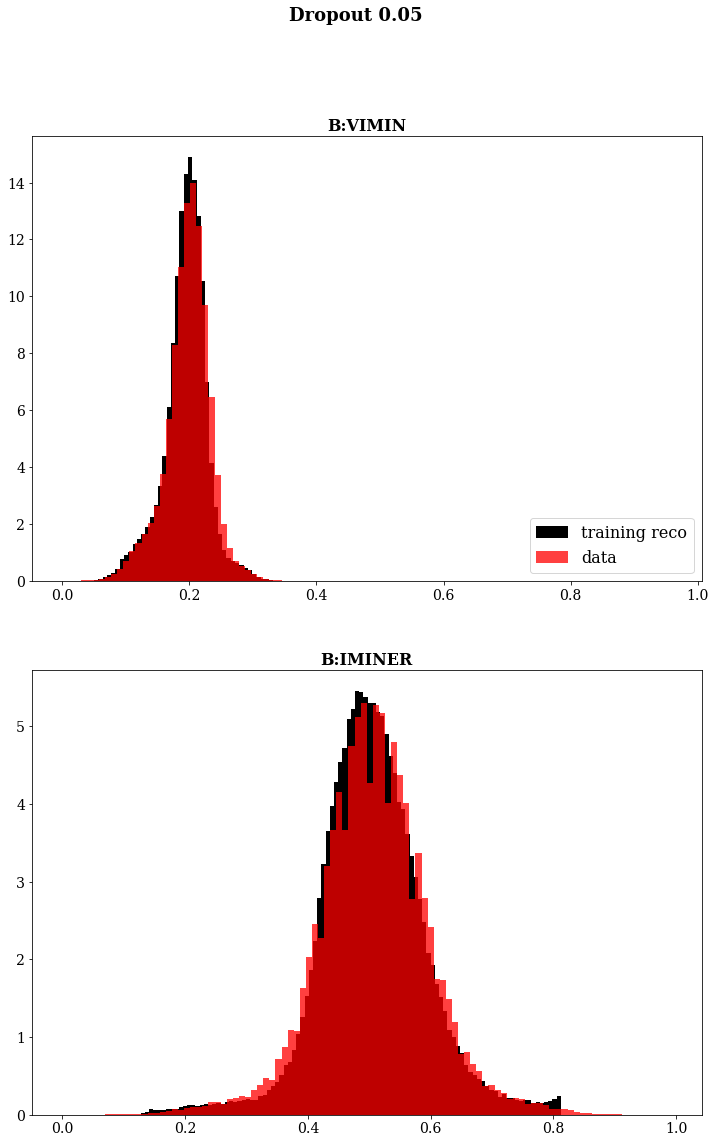

In [0]:
# #before
# calibration_check(model, .05)

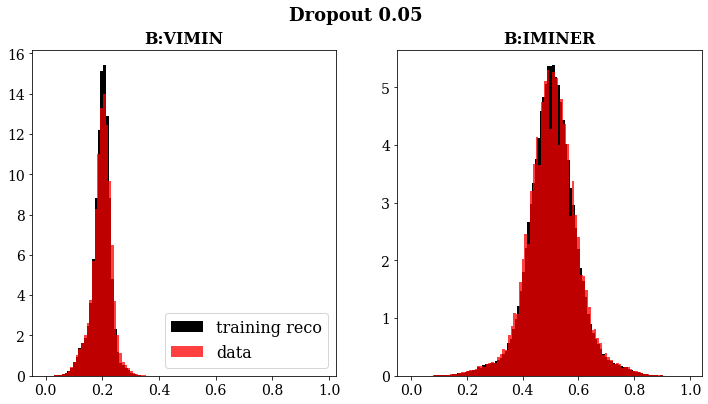

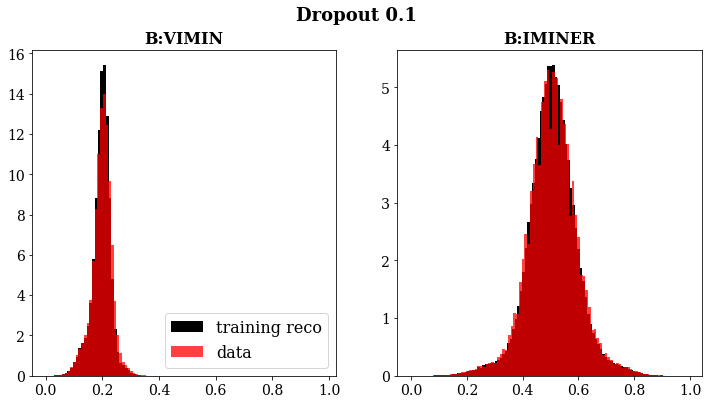

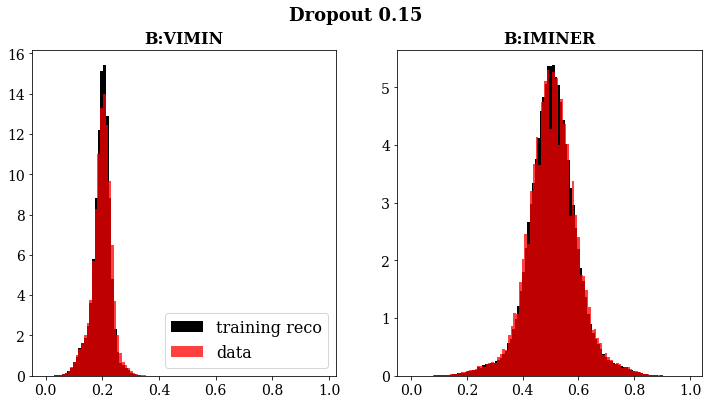

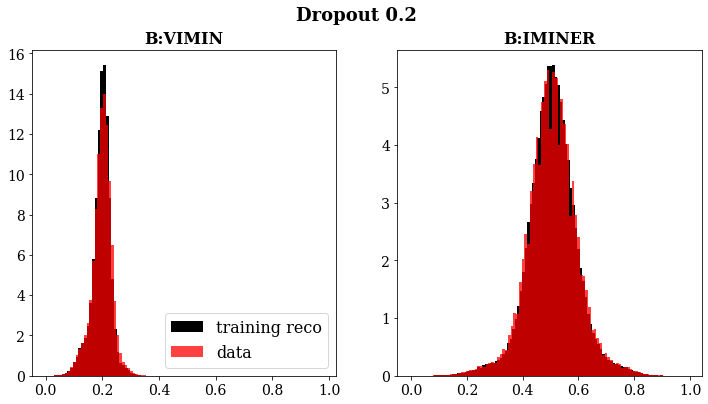

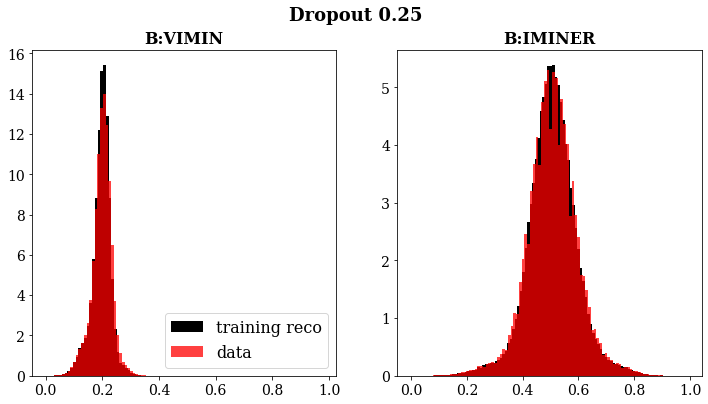

In [0]:
# dropout = [0.05, 0.1, 0.15, 0.2, 0.25]

# for do in dropout:
#   calibration_check(model, do)

In [0]:
# #f, a = plt.subplots(figsize=(8,6))
# cd_X_train_pred = cd_model.predict(X_train)
# cd_train_mae_loss = np.mean(np.abs(cd_X_train_pred - Y_train), axis=1) #Y_train used to be X_train which ???? #want a gaussian centered around 0
# print(cd_train_mae_loss)
# #plt.hist(train_mae_loss,color='black',label='training reco',bins=100,density=True,range=(train_mae_loss.min(),train_mae_loss.max()))
# #plt.hist(cd_train_mae_loss, color='red',label='post-training reco',alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))
# # print(train_mae_loss.min())
# # print(train_mae_loss.max())
# # plt.xlim(train_mae_loss.min(),train_mae_loss.max())
# #plt.legend()
# # plt.savefig('calibrated_reconstruction.png')

[0.00985174 0.00575337 0.00690117 ... 0.00379515 0.05624755 0.00501367]

In [0]:
# print(cd_X_train_pred.shape)
# print(Y_train.shape)
# print(np.abs(cd_X_train_pred - Y_train).shape)
# print(np.mean(np.abs(cd_X_train_pred - Y_train), axis=1).shape)

(174983, 2)
(174983, 2)
(174983, 2)
(174983,)

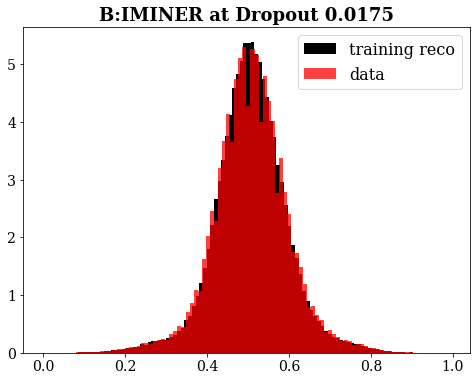

In [0]:
# f, a = plt.subplots(figsize=(8,6))
# plt.hist(cd_X_train_pred[:,1], color='black',label='training reco',bins=100,density=True)
# plt.hist(Y_train[:,1], color='red',label='data',alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))
# plt.title('B:IMINER at Dropout {}'.format(dropout))
# plt.legend()

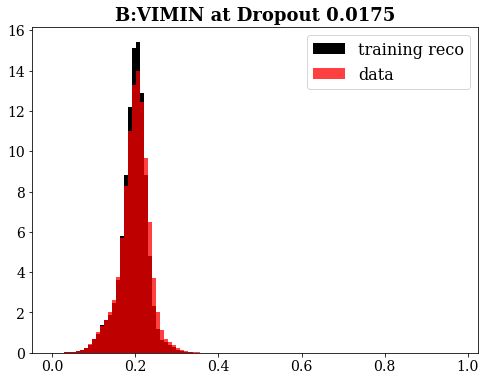

In [0]:
# f, a = plt.subplots(figsize=(8,6))
# plt.hist(cd_X_train_pred[:,0], color='black',label='training reco',bins=100,density=True)
# plt.hist(Y_train[:,0], color='red',label='data',alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))
# plt.title('B:VIMIN at Dropout {}'.format(dropout))
# plt.legend()

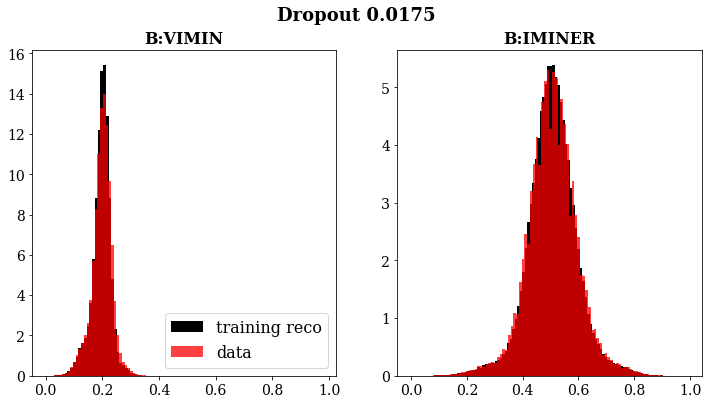

In [0]:
#   fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
 
#   ax[0].set_title('B:VIMIN')
#   ax[0].hist(cd_X_train_pred[:,0], color='black',label='training reco',bins=100,density=True)
#   ax[0].hist(Y_train[:,0], color='red',label='data',alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))
#   ax[0].legend(loc= 'lower right')

#   ax[1].set_title('B:IMINER')
#   ax[1].hist(cd_X_train_pred[:,1], color='black',label='training reco',bins=100,density=True)
#   ax[1].hist(Y_train[:,1], color='red',label='data',alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))

#   plt.suptitle('Dropout {}'.format(dropout))

In [0]:
# cd_X_train_pred[:,1]

Out[37]: array([0.41422865, 0.41352576, 0.44714433, ..., 0.5098526 , 0.5372956 ,
 0.68591017], dtype=float32)

In [0]:
# cd_X_train_pred[0]

Out[39]: array([0.22048056, 0.41422865], dtype=float32)

In [0]:
# X_test

Out[13]: array([[[0.1643219 , 0.18353271, 0.20812988, ..., 0.22554016,
 0.21594238, 0.21011353],
 [0.6213389 , 0.5627615 , 0.4874477 , ..., 0.43933055,
 0.46861923, 0.48535565],
 [0.6865845 , 0.6865845 , 0.6865845 , ..., 0.6865845 ,
 0.6865845 , 0.6865845 ],
 [0.5403428 , 0.54201794, 0.54279965, ..., 0.5486068 ,
 0.5481601 , 0.54682 ],
 [0.39221892, 0.23548028, 0.08190618, ..., 0.47989577,
 0.618764 , 0.7580045 ],
 [0.22304401, 0.06967693, 0. , ..., 0.6264512 ,
 0.76818633, 0.90550226]],

 [[0.18353271, 0.20812988, 0.21492004, ..., 0.21594238,
 0.21011353, 0.20295715],
 [0.5627615 , 0.4874477 , 0.4707113 , ..., 0.46861923,
 0.48535565, 0.5083682 ],
 [0.6865845 , 0.6865845 , 0.6865845 , ..., 0.6865845 ,
 0.6865845 , 0.6865845 ],
 [0.54201794, 0.54279965, 0.5441956 , ..., 0.5481601 ,
 0.54682 , 0.5454799 ],
 [0.23548028, 0.08190618, 0.00316456, ..., 0.618764 ,
 0.7580045 , 0.89575577],
 [0.06967693, 0. , 0.01992077, ..., 0.76818633,
 0.90550226, 0.993085 ]],

 [[0.20812988, 0.21492004, 0.18493652, ..., 0.21011353,
 0.20295715, 0.19166565],
 [0.4874477 , 0.4707113 , 0.5627615 , ..., 0.48535565,
 0.5083682 , 0.5376569 ],
 [0.6865845 , 0.6865845 , 0.6865845 , ..., 0.6865845 ,
 0.6865845 , 0.6865845 ],
 [0.54279965, 0.5441956 , 0.5457591 , ..., 0.54682 ,
 0.5454799 , 0.5452007 ],
 [0.08190618, 0.00316456, 0.0232688 , ..., 0.7580045 ,
 0.89575577, 0.990134 ],
 [0. , 0.01992077, 0.02012686, ..., 0.90550226,
 0.993085 , 0.9915967 ]],

 ...,

 [[0.21003723, 0.18374634, 0.19017029, ..., 0.18687439,
 0.20594788, 0.22207642],
 [0.4330544 , 0.51882845, 0.5125523 , ..., 0.52719665,
 0.5878661 , 0.58577406],
 [0.7313843 , 0.7313843 , 0.7313843 , ..., 0.7313843 ,
 0.7313843 , 0.7313843 ],
 [0.72176 , 0.722095 , 0.722765 , ..., 0.72511023,
 0.7249427 , 0.72455186],
 [0.9903202 , 0.99311244, 0.7211467 , ..., 0.02345495,
 0.02382725, 0.07110946],
 [0.9915967 , 0.8841848 , 0.71071374, ..., 0.02028713,
 0.07233303, 0.20834386]],

 [[0.18374634, 0.19017029, 0.18847656, ..., 0.20594788,
 0.22207642, 0.2411499 ],
 [0.51882845, 0.5125523 , 0.5920502 , ..., 0.5878661 ,
 0.58577406, 0.5251046 ],
 [0.7313843 , 0.7313843 , 0.7313843 , ..., 0.7313843 ,
 0.7313843 , 0.7313843 ],
 [0.722095 , 0.722765 , 0.7233234 , ..., 0.7249427 ,
 0.72455186, 0.72365844],
 [0.99311244, 0.7211467 , 0.7211467 , ..., 0.02382725,
 0.07110946, 0.20290396],
 [0.8841848 , 0.71071374, 0.54324186, ..., 0.07233303,
 0.20834386, 0.34726265]],

 [[0.19017029, 0.18847656, 0.20030212, ..., 0.22207642,
 0.2411499 , 0.24798584],
 [0.5125523 , 0.5920502 , 0.57322174, ..., 0.58577406,
 0.5251046 , 0.47907948],
 [0.7313843 , 0.7313843 , 0.7313843 , ..., 0.7313843 ,
 0.7313843 , 0.7313843 ],
 [0.722765 , 0.7233234 , 0.72455186, ..., 0.72455186,
 0.72365844, 0.7233234 ],
 [0.7211467 , 0.7211467 , 0.39091587, ..., 0.07110946,
 0.20290396, 0.3412137 ],
 [0.71071374, 0.54324186, 0.3808532 , ..., 0.20834386,
 0.34726265, 0.48789877]]], dtype=float32)

In [0]:
# # MUST BE TUNED 
# dropout = 0.5 #loop over some range  #try these values [0.05, 0.1, 0.15, 0.2, 0.25]
# cd_model = create_dropout_predict_model(model,dropout)
# dconf = cd_model.get_config()
# #print(dconf)

In [0]:
#   cd_X_train_pred = cd_model.predict(X_train)

In [0]:
# X_test.shape

Out[33]: (74983, 6, 15)

In [0]:
# cd_model(X_test[0:500])

Out[32]: <tf.Tensor: shape=(500, 2), dtype=float32, numpy=
array([[0.19982326, 0.5098626 ],
 [0.18460475, 0.5518176 ],
 [0.1729592 , 0.5837936 ],
 [0.17526747, 0.5771207 ],
 [0.1565366 , 0.64474887],
 [0.16544966, 0.6138144 ],
 [0.17207733, 0.5960841 ],
 [0.18304041, 0.55847514],
 [0.19646704, 0.51383764],
 [0.1931006 , 0.52305317],
 [0.1819909 , 0.553584 ],
 [0.17699733, 0.5664638 ],
 [0.18100622, 0.5483729 ],
 [0.19021904, 0.5210431 ],
 [0.19841042, 0.4965149 ],
 [0.20696156, 0.4684981 ],
 [0.18964896, 0.53959304],
 [0.19313857, 0.5281223 ],
 [0.20411412, 0.49338692],
 [0.19491962, 0.52877474],
 [0.199755 , 0.50570023],
 [0.21038327, 0.46430758],
 [0.20615229, 0.48138916],
 [0.19296244, 0.52807367],
 [0.17885406, 0.5785636 ],
 [0.18024763, 0.5718546 ],
 [0.18800457, 0.5455401 ],
 [0.1622804 , 0.62757707],
 [0.15394622, 0.64199096],
 [0.16244823, 0.61135495],
 [0.16889325, 0.59328634],
 [0.17373906, 0.57816696],
 [0.20105734, 0.4992102 ],
 [0.20322946, 0.49427393],
 [0.18203121, 0.5599217 ],
 [0.1641471 , 0.6106663 ],
 [0.16630591, 0.5982469 ],
 [0.17763805, 0.5657451 ],
 [0.18931755, 0.5409818 ],
 [0.20511238, 0.5009772 ],
 [0.21406025, 0.4681498 ],
 [0.21265677, 0.4653722 ],
 [0.2113658 , 0.45994282],
 [0.19696696, 0.5011735 ],
 [0.18438902, 0.5458343 ],
 [0.17917189, 0.57222164],
 [0.1586948 , 0.6359674 ],
 [0.15537651, 0.65288126],
 [0.15504462, 0.66108394],
 [0.17959064, 0.57278645],
 [0.19219333, 0.5326344 ],
 [0.21295683, 0.4662459 ],
 [0.21757254, 0.4569314 ],
 [0.18577906, 0.5482025 ],
 [0.17011109, 0.5808473 ],
 [0.16265827, 0.6022849 ],
 [0.16344 , 0.60158104],
 [0.17949708, 0.55540836],
 [0.19168037, 0.5223604 ],
 [0.21497129, 0.4539429 ],
 [0.22992031, 0.41358653],
 [0.22990996, 0.41263992],
 [0.22650373, 0.41956973],
 [0.19862461, 0.5307565 ],
 [0.17264822, 0.59372556],
 [0.14914708, 0.6644818 ],
 [0.14975837, 0.6541952 ],
 [0.16405873, 0.6156718 ],
 [0.191095 , 0.532483 ],
 [0.19152278, 0.54312235],
 [0.18962602, 0.5492576 ],
 [0.1807704 , 0.570046 ],
 [0.179122 , 0.5626843 ],
 [0.17034724, 0.5883435 ],
 [0.1798179 , 0.55233926],
 [0.19535148, 0.51321405],
 [0.20503804, 0.4838425 ],
 [0.18443194, 0.5513555 ],
 [0.1810259 , 0.5587454 ],
 [0.17869747, 0.56739223],
 [0.18742944, 0.53850126],
 [0.20483363, 0.48550287],
 [0.21251738, 0.46260345],
 [0.21680433, 0.45062193],
 [0.22338527, 0.42968804],
 [0.2231685 , 0.44263056],
 [0.19348457, 0.53022003],
 [0.15828843, 0.6351742 ],
 [0.15056063, 0.62461066],
 [0.1417599 , 0.6846072 ],
 [0.17930274, 0.58054495],
 [0.20701152, 0.4939232 ],
 [0.20371208, 0.5081184 ],
 [0.19411229, 0.5331489 ],
 [0.18748528, 0.53579295],
 [0.17378962, 0.57100827],
 [0.17557096, 0.5602575 ],
 [0.19256946, 0.5109468 ],
 [0.20450166, 0.47395855],
 [0.22035559, 0.43332833],
 [0.19659728, 0.52136815],
 [0.19894135, 0.50964653],
 [0.20907462, 0.4838443 ],
 [0.21081302, 0.4677834 ],
 [0.21110454, 0.46451285],
 [0.20954406, 0.472453 ],
 [0.21083985, 0.46681422],
 [0.20187978, 0.49510452],
 [0.20001347, 0.51114184],
 [0.17177401, 0.60231054],
 [0.16260709, 0.613397 ],
 [0.1605739 , 0.6178767 ],
 [0.17426008, 0.5779544 ],
 [0.19715519, 0.5064691 ],
 [0.22050354, 0.44686836],
 [0.20424213, 0.49948883],
 [0.19777675, 0.5072979 ],
 [0.17717016, 0.5630139 ],
 [0.16957708, 0.5805423 ],
 [0.18349932, 0.54172504],
 [0.19968942, 0.489505 ],
 [0.21391782, 0.44711477],
 [0.23082362, 0.40991616],
 [0.24020192, 0.38480163],
 [0.24716815, 0.3672374 ],
 [0.21859848, 0.4766489 ],
 [0.18825084, 0.55074936],
 [0.17877454, 0.5647128 ],
 [0.17873797, 0.56545436],
 [0.17633012, 0.5796719 ],
 [0.18892726, 0.53624 ],
 [0.18698215, 0.5574977 ],
 [0.18490961, 0.56099105],
 [0.18890841, 0.5313822 ],
 [0.1895032 , 0.5322989 ],
 [0.18970351, 0.53492737],
 [0.20027742, 0.5011967 ],
 [0.20679802, 0.48127848],
 [0.18587357, 0.54275423],
 [0.17304978, 0.5752015 ],
 [0.1788814 , 0.5552609 ],
 [0.17171519, 0.58348423],
 [0.19708364, 0.5021896 ],
 [0.21045518, 0.45974302],
 [0.22597787, 0.4185776 ],
 [0.24434596, 0.37994492],
 [0.24

In [0]:
# num_iter=30
# input_test = X_test
# predictions = []
# for i in range(num_iter):
#     np.random.seed(i)
#     tf.random.set_seed(i)
#     #check to see if random seed is set
#     predictions.append(cd_model(input_test[0:500])[0])

# predictions

Out[35]: [<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.19982326, 0.5098626 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.19982326, 0.5098626 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.19982326, 0.5098626 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.19982326, 0.5098626 ], dtype=float32)>]

In [0]:
# # MUST BE TUNED 
# dropout = 0.5 #loop over some range  #try these values [0.05, 0.1, 0.15, 0.2, 0.25]
# cd_model = create_dropout_predict_model(model,dropout)
# dconf = cd_model.get_config()
# #print(dconf)

In [0]:
# num_iter=15
# input_test = X_test
# predictions = []

# pred_function = create_dropout_predict_function(model, 0.15)

# for i in range(num_iter):
#     np.random.seed(i)
#     tf.random.set_seed(i)
#     #check to see if random seed is set
#     predictions.append(pred_function(input_test)[0])

# predictions

<tensorflow.python.keras.layers.recurrent.LSTM object at 0x7fab34174610>
<tensorflow.python.keras.layers.core.Dense object at 0x7fab20b9c750>

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-1169206527725225> in <module> 
 9 tf . random . set_seed ( i ) 
 10 #check to see if random seed is set 
 ---> 11 predictions . append ( pred_function ( input_test ) ) 
 12 
 13 predictions

 /databricks/python/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py in __call__ (self, inputs) 
 3725 value = math_ops . cast ( value , tensor . dtype ) 
 3726 converted_inputs . append ( value ) 
 -> 3727 outputs = self . _graph_fn ( * converted_inputs ) 
 3728 
 3729 # EagerTensor.numpy() will often make a copy to ensure memory safety. 

 /databricks/python/lib/python3.7/site-packages/tensorflow_core/python/eager/function.py in __call__ (self, *args, **kwargs) 
 1549 TypeError : For invalid positional / keyword argument combinations . 
 1550 """
 -> 1551 return self . _call_impl ( args , kwargs ) 
 1552 
 1553 def _call_impl ( self , args , kwargs , cancellation_manager = None ) : 

 /databricks/python/lib/python3.7/site-packages/tensorflow_core/python/eager/function.py in _call_impl (self, args, kwargs, cancellation_manager) 
 1589 raise TypeError("Keyword arguments {} unknown. Expected {}.".format(
 1590 list(kwargs.keys()), list(self._arg_keywords)))
 -> 1591 return self . _call_flat ( args , self . captured_inputs , cancellation_manager ) 
 1592 
 1593 def _filtered_call ( self , args , kwargs ) : 

 /databricks/python/lib/python3.7/site-packages/tensorflow_core/python/eager/function.py in _call_flat (self, args, captured_inputs, cancellation_manager) 
 1690 # No tape is watching; skip to running the function. 
 1691 return self._build_call_outputs(self._inference_function.call(
 -> 1692 ctx, args, cancellation_manager=cancellation_manager))
 1693 forward_backward = self._select_forward_and_backward_functions(
 1694 args , 

 /databricks/python/lib/python3.7/site-packages/tensorflow_core/python/eager/function.py in call (self, ctx, args, cancellation_manager) 
 525 "Arguments and signature arguments do not match. " 
 526 "got: %s, expected: %s " % 
 --> 527 (len(args), len(list(self.signature.input_arg))))
 528 
 529 function_call_options = ctx . function_call_options

 ValueError : Arguments and signature arguments do not match. got: 12, expected: 13

In [0]:
# # Caculate mean
# pred_mean = np.mean(predictions, axis=0)
# # Quantiles
# #ci = 0.95
# lower_lim = np.std() #np.quantile(predictions, 0.5-ci/2, axis=0)
# upper_lim = np.std() #np.quantile(predictions, 0.5+ci/2, axis=0)

# predictions

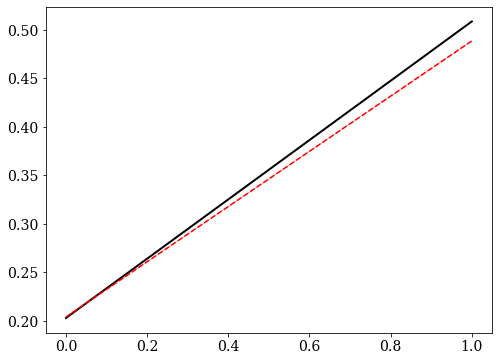

In [0]:
# num_iter=50
# input_test = X_test
# predictions = []
# for i in range(num_iter):
#     np.random.seed(i)
#     tf.random.set_seed(i)
#     predictions.append(cd_model(input_test)[0])
# # Caculate mean
# pred_mean = np.mean(predictions, axis=0)
# # Quantiles
# ci = 0.95
# lower_lim = np.quantile(predictions, 0.5-ci/2, axis=0)
# upper_lim = np.quantile(predictions, 0.5+ci/2, axis=0)

# x = np.arange(0,len(input_test),1)
# f, a = plt.subplots(figsize=(8,6))
# p0 = a.plot(Y_test[0],linewidth=2,color='black', label='data') #used to be X_test
# p1 = a.plot(pred_mean, label='mean', color='red',linestyle='dashed')
# a.plot(upper_lim, linewidth=0.5,color='red',linestyle='dashed', label='upper', alpha=0.5)
# a.plot(lower_lim, linewidth=0.5,color='red',linestyle='dashed', label='lower', alpha=0.5)
# a.fill_between(x, lower_lim.reshape(-1), upper_lim.reshape(-1), color='yellow', alpha=0.5) 
# p2 = a.fill(np.NaN, np.NaN,  color='yellow', alpha=0.5)
# a.legend([p0[0],(p2[0], p1[0]) ], ['Data','Surrogate Model 95% CL'])
# #plt.savefig('cd_prediction.png')
# #plt.savefig('deterministic_prediction.png')

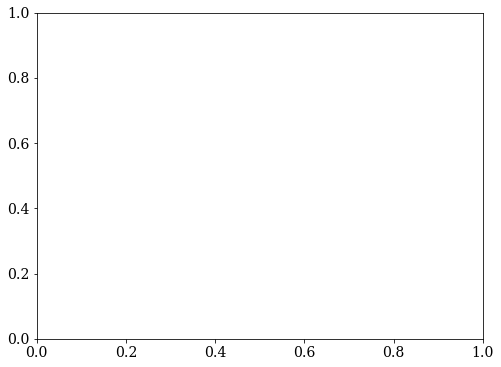

In [0]:
# x = np.arange(0,len(input_test),1)
# f, a = plt.subplots(figsize=(8,6))
# # p0 = a.plot(Y_test[0],linewidth=2,color='black', label='data') #used to be X_test
# # p1 = a.plot(pred_mean, label='mean', color='red',linestyle='dashed')
# # a.plot(upper_lim, linewidth=0.5,color='red',linestyle='dashed', label='upper', alpha=0.5)
# # a.plot(lower_lim, linewidth=0.5,color='red',linestyle='dashed', label='lower', alpha=0.5)
# a.fill_between(x, lower_lim.reshape(-1), upper_lim.reshape(-1), color='yellow', alpha=0.5) 
# p2 = a.fill(np.NaN, np.NaN,  color='yellow', alpha=0.5)
# a.legend([p0[0],(p2[0], p1[0]) ], ['Data','Surrogate Model 95% CL'])
# #plt.savefig('cd_prediction.png')
# #plt.savefig('deterministic_prediction.png')

In [0]:
# pred_mean

Out[49]: array([0.20403107, 0.4883347 ], dtype=float32)

In [0]:
# upper_lim

Out[48]: array([0.20403114, 0.48833489])

In [0]:
# a.plot(upper_lim, linewidth=0.5,color='red',linestyle='dashed', label='upper', alpha=0.5)
# a.plot(lower_lim, linewidth=0.5,color='red',linestyle='dashed', label='lower', alpha=0.5)

Out[42]: [<matplotlib.lines.Line2D at 0x7f52088e4b50>]

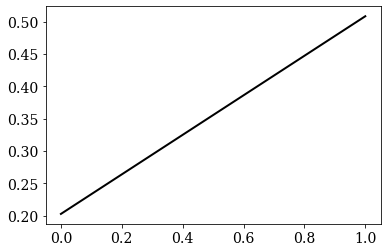

In [0]:
# plt.plot(Y_test[0],linewidth=2,color='black', label='data')

In [0]:
# Y_test

Out[37]: array([[0.20295715, 0.5083682 ],
 [0.19166565, 0.5376569 ],
 [0.19322205, 0.5334728 ],
 ...,
 [0.2411499 , 0.5251046 ],
 [0.24798584, 0.47907948],
 [0.24249268, 0.42050207]], dtype=float32)

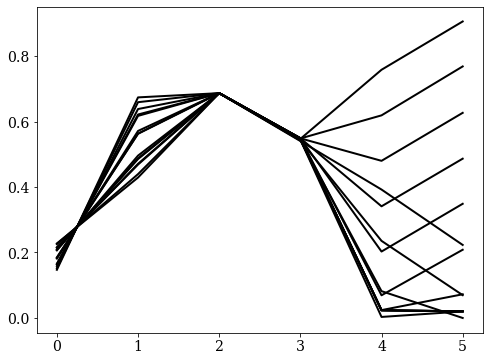

In [0]:
# f, a = plt.subplots(figsize=(8,6))
# a.plot(input_test[0],linewidth=2,color='black', label='data')

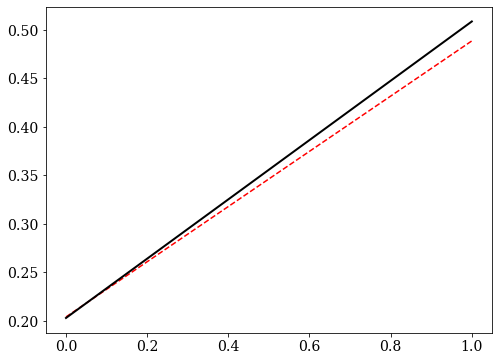

In [0]:
# f, a = plt.subplots(figsize=(8,6))
# a.plot(pred_mean, label='mean', color='red',linestyle='dashed')
# a.plot(Y_test[0],linewidth=2,color='black', label='data')

In [0]:
# predictions #at .9 dropout all the same value

Out[18]: [<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.20403114, 0.4883349 ], dtype=float32)>,
 

In [0]:
# np.mean(predictions, axis=0)

Out[20]: array([0.20403107, 0.4883347 ], dtype=float32)

In [0]:
# pred_mean

Out[29]: array([0.20403107, 0.4883347 ], dtype=float32)

In [0]:
#more from malachi's notebook

In [0]:
%run ./models

2.1.0

In [0]:
in_shape = (6, 15)
out_shape = 2
model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)
model.load_weights("/dbfs/FileStore/models/D03012021-T173721/fullbooster_noshift_e25_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D03012021-T173721_kfold4__final.h5")
#125 epoch trained with new scaling: /D03012021-T173721/fullbooster_noshift_e25_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D03012021-T173721_kfold4__final.h5

#total 10 epochs trained: /dbfs/FileStore/models/D02182021-T201806/fullbooster_noshift_e2_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02182021-T201806_kfold4__final.h5

# full model? /FileStore/models/D02172021-T021454/fullbooster_noshift_e1_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02172021-T021454_kfold4__final.h5
#without concrete dropout dbfs:/FileStore/models/D02082021-T160246/fullbooster_noshift_e250_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02082021-T160246_kfold4__final.h5

#literally what is happening
# trial run: /D02282021-T190617/fullbooster_noshift_e1_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02282021-T190617_kfold4__final.h5

In [0]:
from keras.models import Model, Sequential
from keras import backend as K
tf.keras.backend.in_train_phase
def create_dropout_predict_function(model, dropout):

    # Load the config of the original model
    conf = model.get_config()
    #print(conf)
    # Add the specified dropout to all layers
    for layer in conf['layers']:
        #print(layer)
        # Dropout layers
        if layer["class_name"]=="Dropout":
            #print(layer)
            layer["config"]["rate"] = dropout
        # Recurrent layers with dropout
        elif "dropout" in layer["config"].keys():
            layer["config"]["dropout"] = dropout

    model_dropout = keras.Sequential.from_config(conf)

    model_dropout.set_weights(model.get_weights()) 
    print(model_dropout.layers)
    # for some model with dropout ...
    print(model_dropout.layers[1])
    predict_with_dropout = K.function([model_dropout.layers[1].input, K.learning_phase()],[model_dropout.layers[1].output])    
    return predict_with_dropout

--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-1105728367752334> in <module> 
 ----> 1 from keras . models import Model , Sequential
 2 from keras import backend as K
 3 tf . keras . backend . in_train_phase
 4 def create_dropout_predict_function ( model , dropout ) : 
 5 

 ModuleNotFoundError : No module named 'keras'

In [0]:
X_train.shape

Out[23]: (174983, 6, 15)

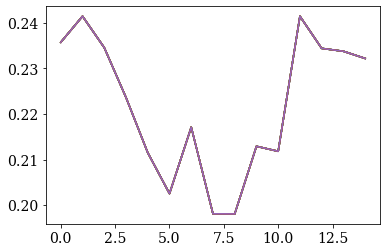

In [0]:
#tf.compat.v1.disable_eager_execution()
pred_function = create_dropout_predict_function(model,0.5)
for i in range(15):
    train_pred_from_f = pred_function([X_train[0],True])
    print(type(train_pred_from_f))
    print(train_pred_from_f)
    plt.plot(train_pred_from_f[0][0])

In [0]:
def create_dropout_predict_model(model, dropout):
    
    # Load the config of the original model
    conf = model.get_config()
    #print(conf)
    # Add the specified dropout to all layers
    for layer in conf['layers']:
        #print(layer)
#         if layer["class_name"]=="LSTM":
#             #print(layer)
#             print(layer["config"]["recurrent_dropout"])
#             layer["config"]["recurrent_dropout"] = dropout
#             print(layer["config"]["recurrent_dropout"])

        # Dropout layers
        if layer["class_name"]=="Dropout":
            # print(layer)
            layer["config"]["rate"] = dropout
        # Recurrent layers with dropout
#         elif "dropout" in layer["config"].keys():
#             layer["config"]["dropout"] = dropout
        
#         elif "recurrent_dropout" in layer["config"].keys():
#             print(layer["config"]["recurrent_dropout"])
#             layer["config"]["recurrent_dropout"] = dropout

    # Create a new model with specified dropout
    print(type(model))
    model_dropout = keras.Model.from_config(conf)

    model_dropout.set_weights(model.get_weights()) 
    return model_dropout

In [0]:
dmodel = create_dropout_predict_model(model,0.9)

<class 'tensorflow.python.keras.engine.training.Model'>
WARNING:tensorflow:Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.

In [0]:
import numpy as np
from keras.models import load_model

dropout = 0.5
num_iter = 15
num_samples = X_train.shape[0]

dmodel = create_dropout_predict_model(model,dropout)
dconf = dmodel.get_config()
input_test = X_train[0].reshape(-1,6,15)
print(input_test.shape)
prediction_bvimin = []
prediction_biminer = []

for i in range(num_iter):
    np.random.seed(i)
    tf.random.set_seed(i)
    prediction_bvimin.append(np.asarray(dmodel(input_test))[0][0])
    prediction_biminer.append(np.asarray(dmodel(input_test))[0][1])

<class 'tensorflow.python.keras.engine.training.Model'>
(1, 6, 15)

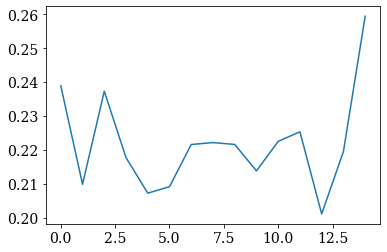

In [0]:
plt.plot(prediction_bvimin)

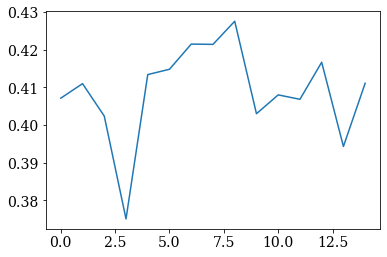

In [0]:
plt.plot(prediction_biminer)

In [0]:
np.asarray(dmodel(input_test))[0]

Out[84]: array([0.24342215, 0.40010864], dtype=float32)

In [0]:
predictions

Out[77]: [<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.23890625, 0.38010582]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.20986658, 0.40683484]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.23730783, 0.4020459 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.2177363 , 0.41980016]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.20726085, 0.41151297]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.20914574, 0.40018636]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.2216056 , 0.40949392]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.22216487, 0.4336187 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.22161576, 0.39654228]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.2138335 , 0.39791462]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.22252521, 0.42415732]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.22533576, 0.39196664]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.2011332 , 0.40378514]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.21950868, 0.41566676]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.2594135 , 0.39331293]], dtype=float32)>]

In [0]:
Y_train[:,1]

Out[26]: array([0.40376568, 0.41004184, 0.44560668, ..., 0.50627613, 0.62343097,
 0.6903765 ], dtype=float32)

In [0]:
def calibrate(model, dropout):
  dmodel = create_dropout_predict_model(model, dropout)
  cd_X_train_pred = dmodel.predict(X_train)
  
  bvimin_pred = unscale('B:VIMIN', cd_X_train_pred[:,0], scale_dict)
  biminer_pred = unscale('B:IMINER', cd_X_train_pred[:,1], scale_dict)
  
  bvimin_data = unscale('B:VIMIN', Y_train[:,0], scale_dict)
  biminer_data = unscale('B:IMINER', Y_train[:,1], scale_dict)

  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))

  ax[0].set_title('B:VIMIN {}'.format(dropout))
  ax[0].hist(bvimin_pred, color='black',label='training reco: {:0.4f} +- {:0.4f}'.format(np.mean(bvimin_pred), np.std(bvimin_pred)),bins=100,density=True)
  ax[0].hist(bvimin_data, color='red',label='data: {:0.4f} +- {:0.4f}'.format(np.mean(bvimin_data), np.std(bvimin_data)), alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))
  ax[0].legend(loc= 'lower right')

  ax[1].set_title('B:IMINER {}'.format(dropout))
  ax[1].hist(biminer_pred, color='black',label='training reco: {:0.4f} +- {:0.4f}'.format(np.mean(biminer_pred), np.std(biminer_pred)),bins=100,density=True)
  ax[1].hist(biminer_data, color='red',label='data: {:0.4f} +- {:0.4f}'.format(np.mean(biminer_data), np.std(biminer_data)),alpha=0.75,bins=100,density=True) #, range=(train_mae_loss.min(),train_mae_loss.max()))
  ax[1].legend(loc = 'lower right')
  
  #plt.suptitle('Dropout {}'.format(dconf['layers'][1]['config']['rate']))

In [0]:
print(Y_train[:,0])
print(unscale('B:VIMIN', Y_train[:,0], scale_dict))

[0.2322 0.22972275 0.21775974 ... 0.2064367 0.20249376 0.16404492]
[103.42498 103.42469 103.42329 ... 103.42196 103.42149 103.416985]

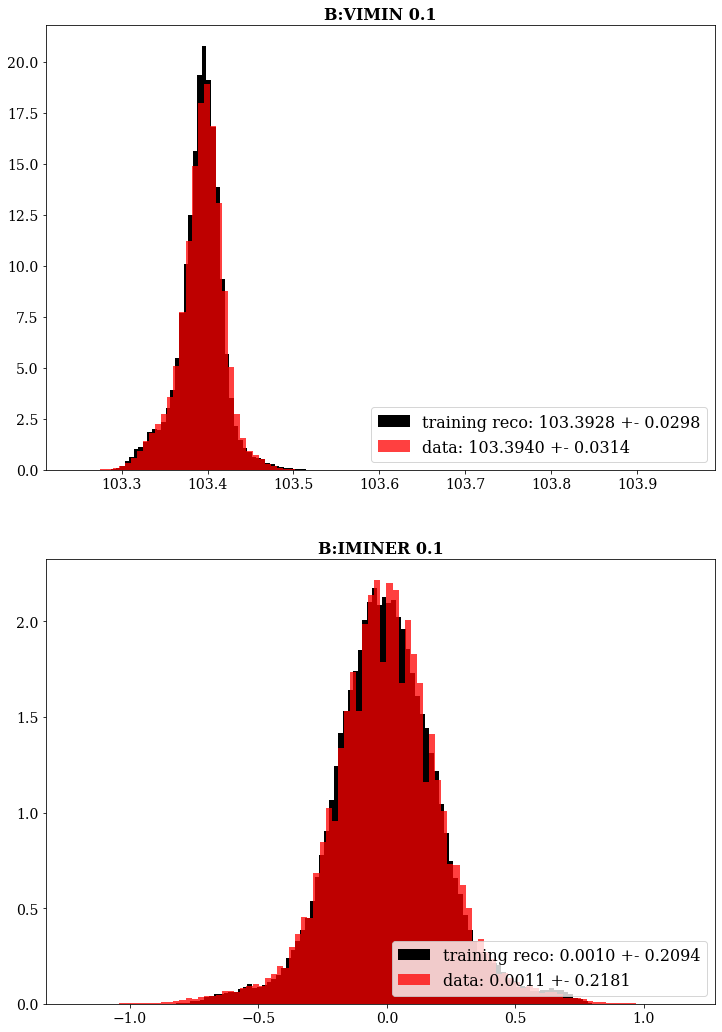

In [0]:
calibrate(model, .1)

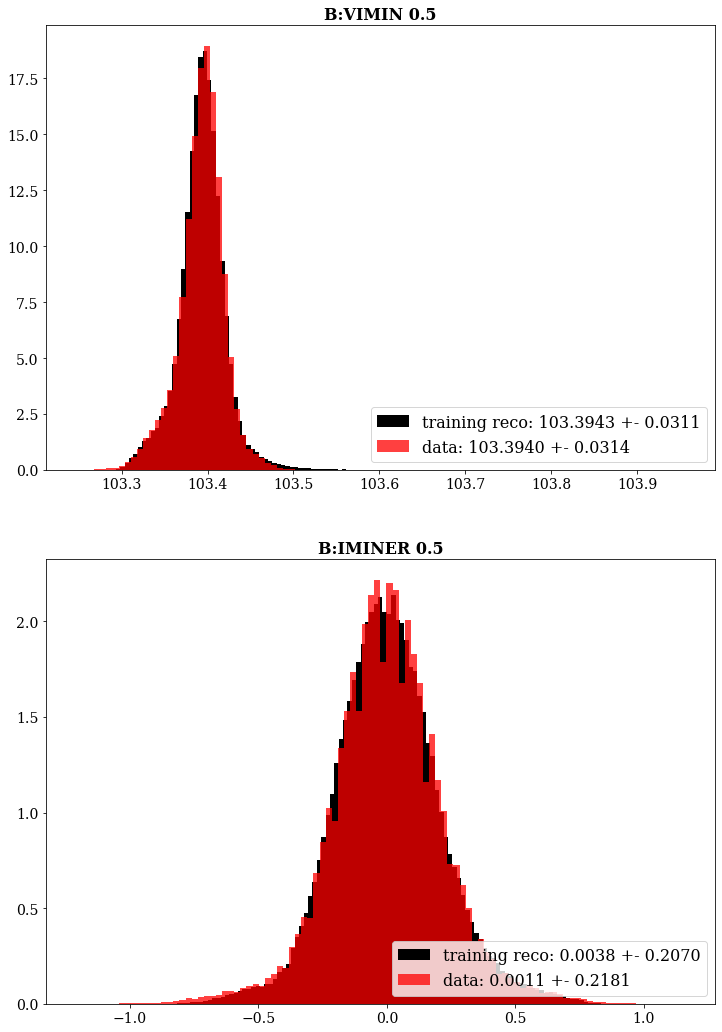

In [0]:
calibrate(model, .5)

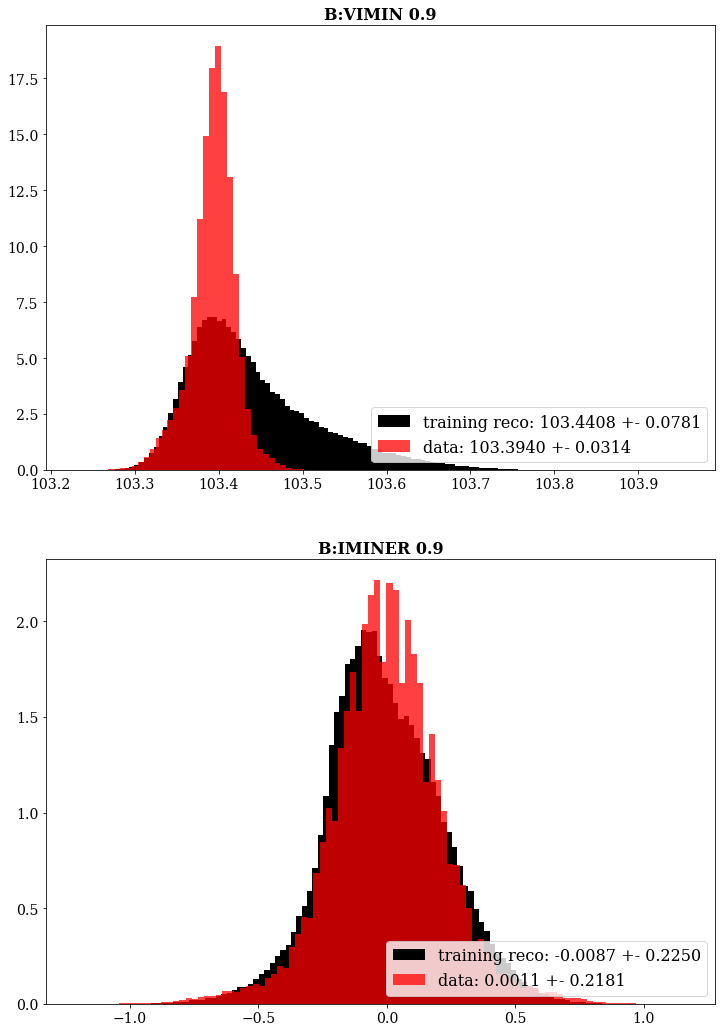

In [0]:
calibrate(model, .9)

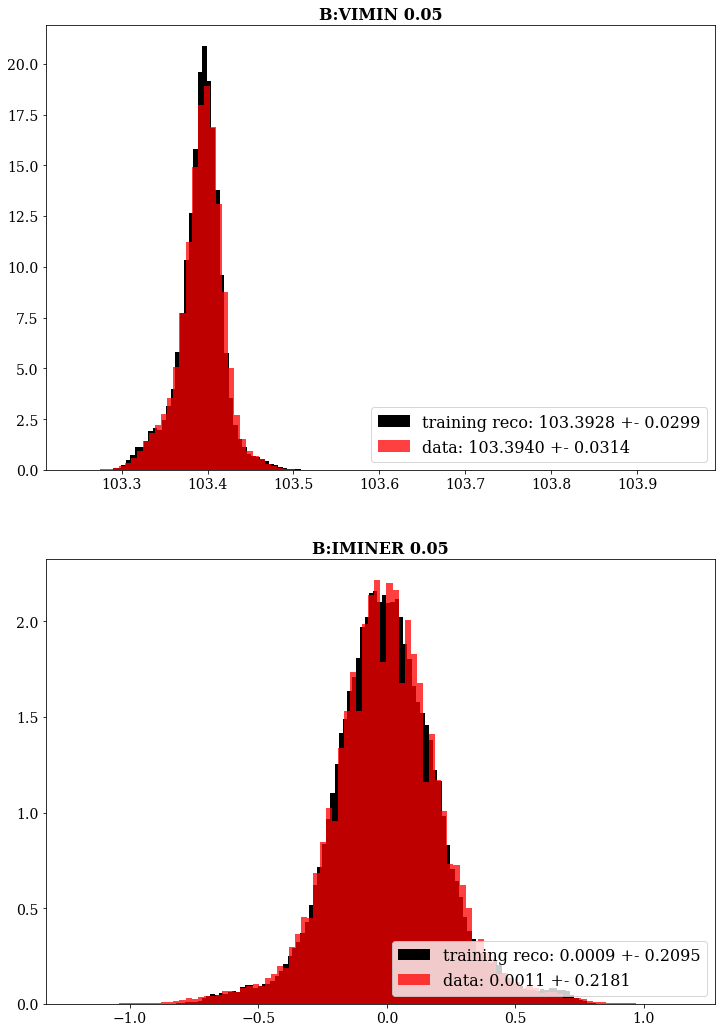

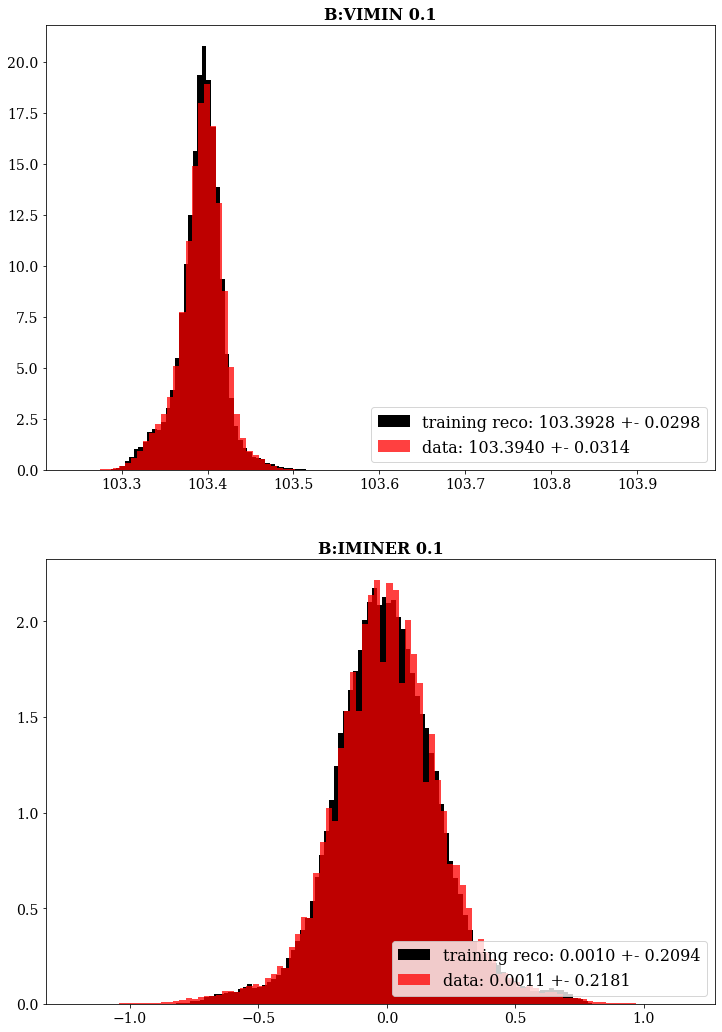

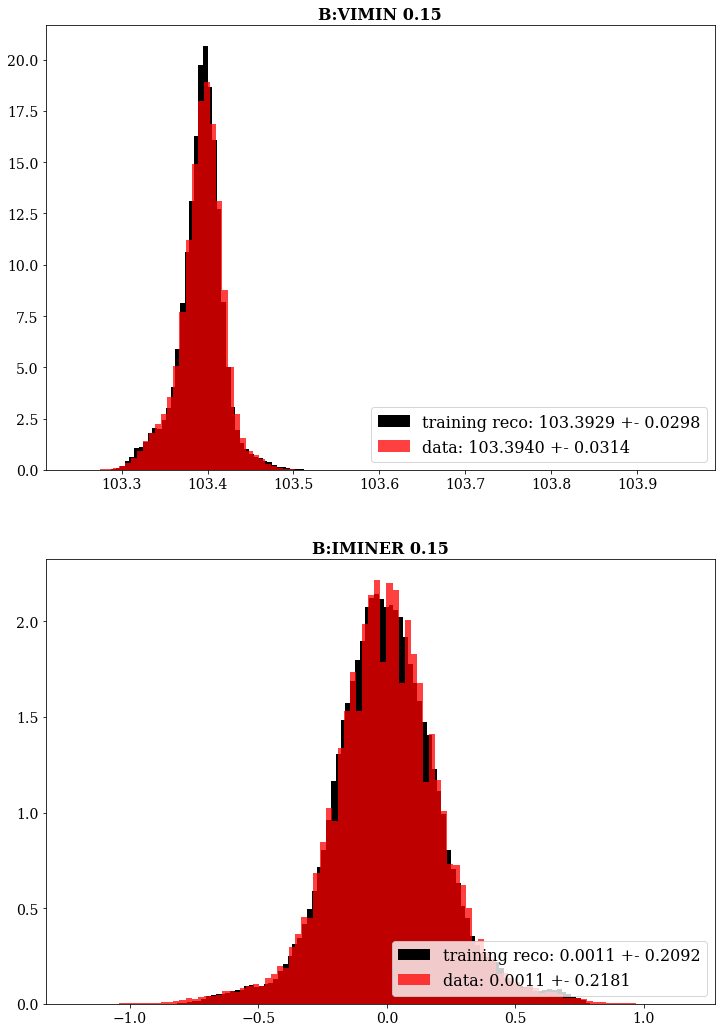

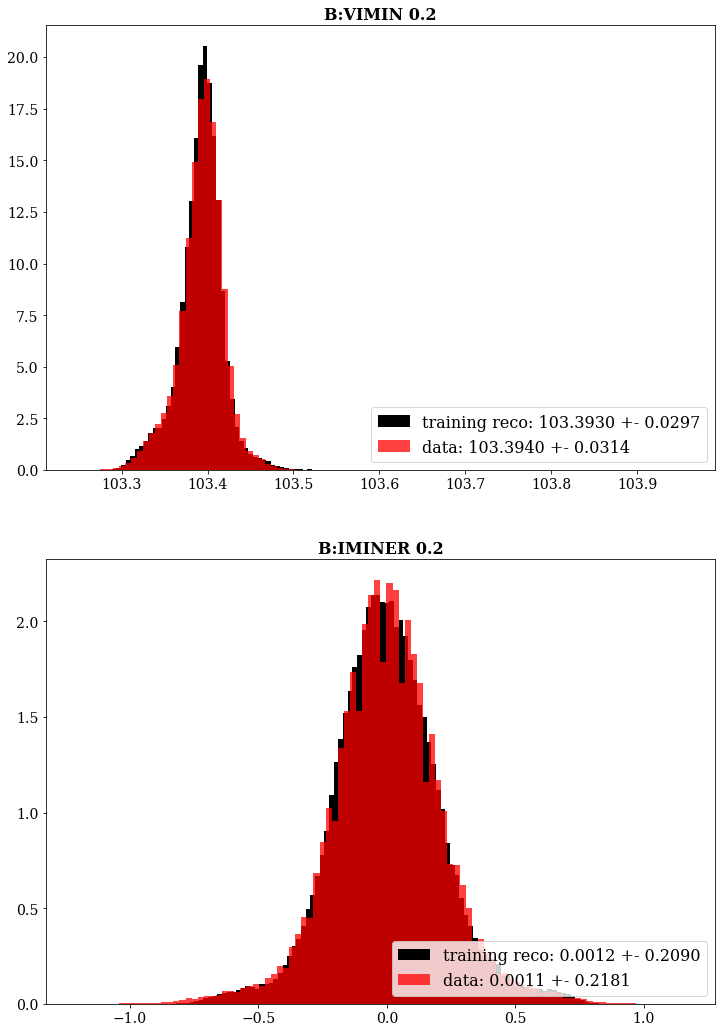

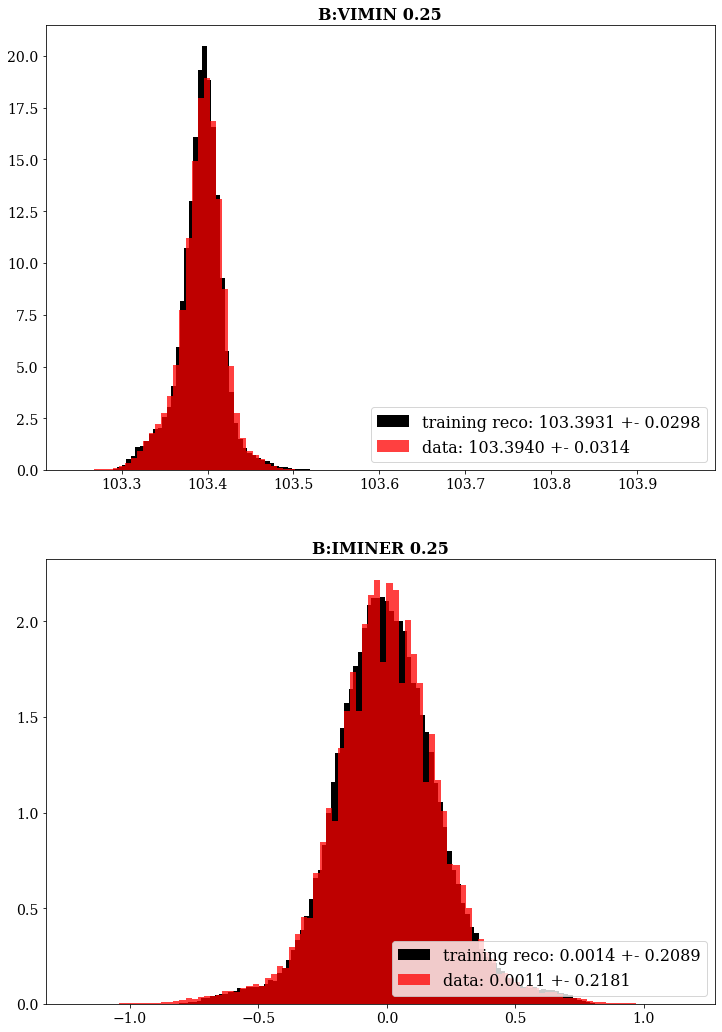

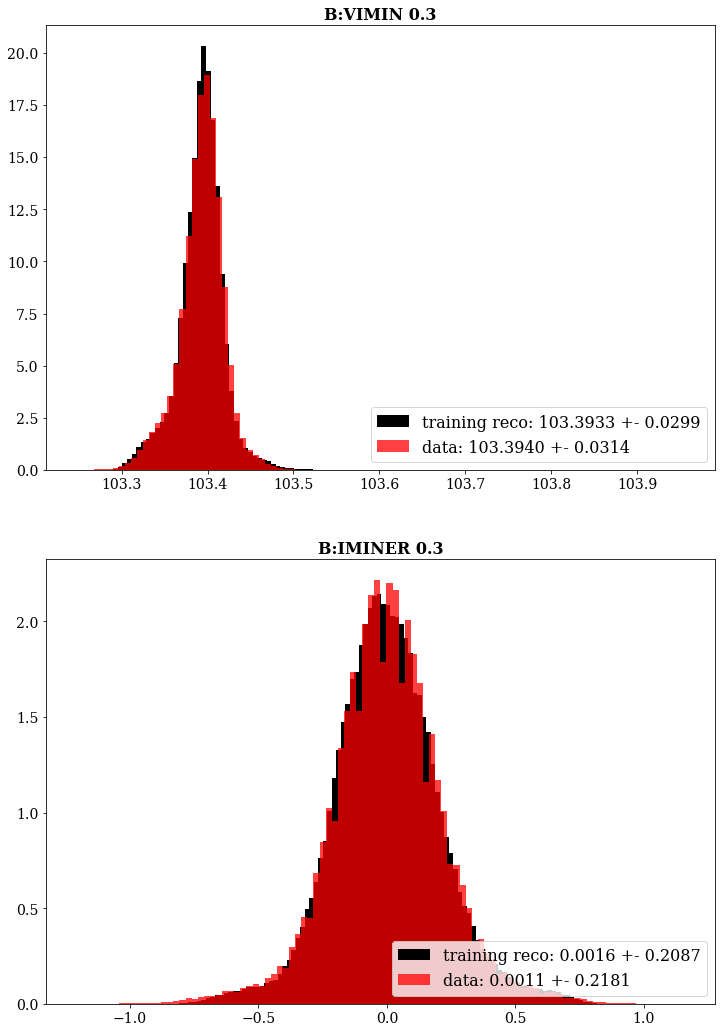

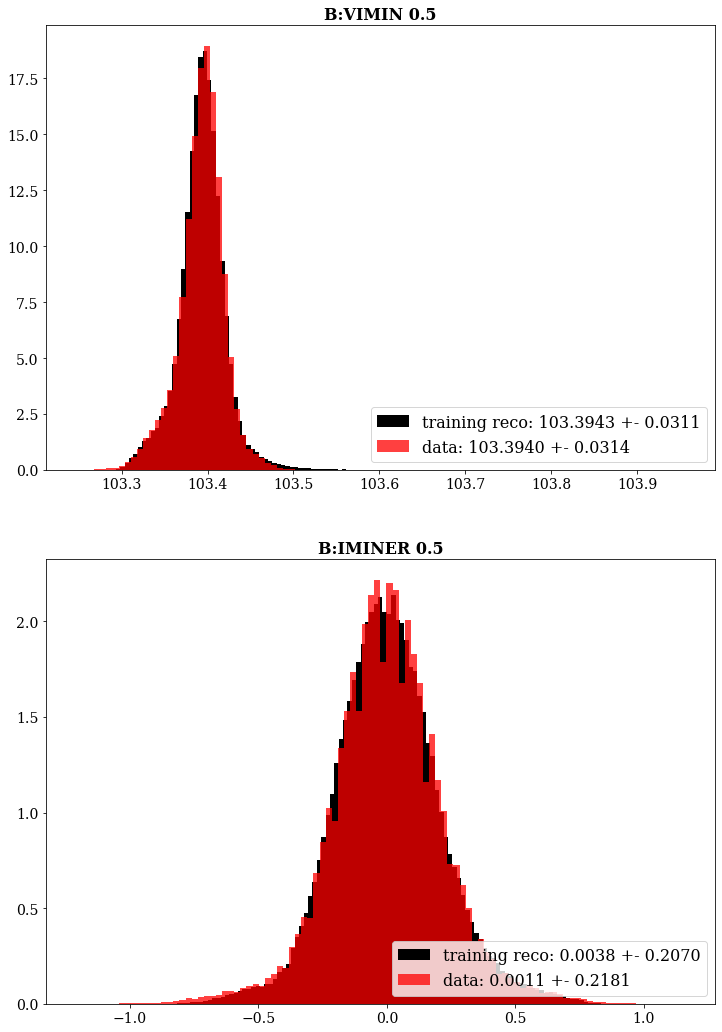

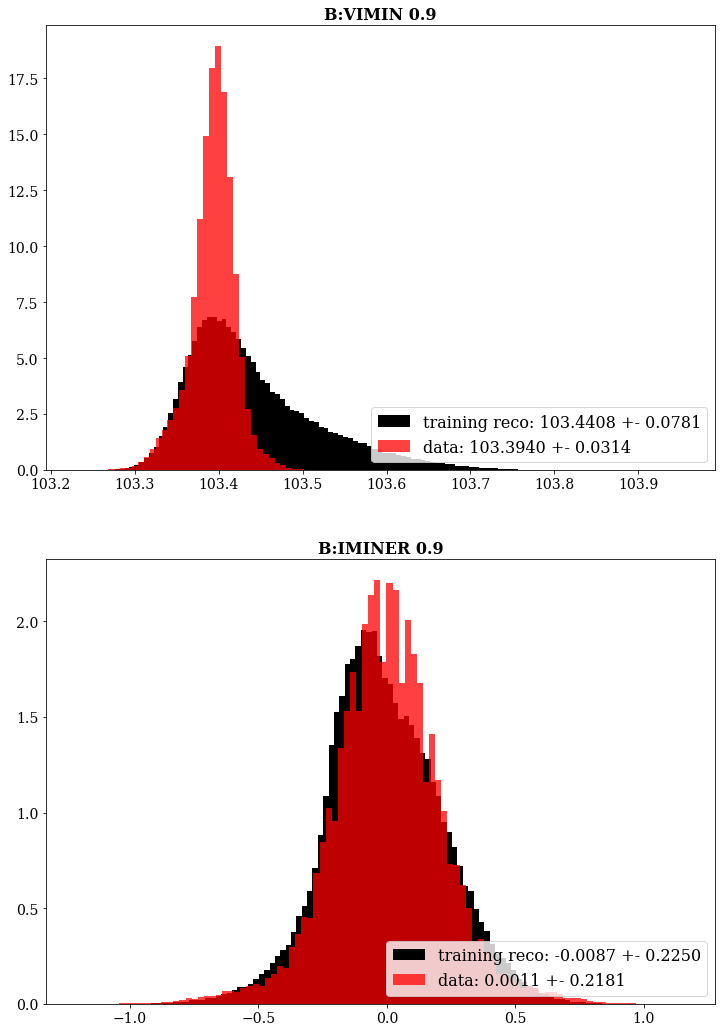

In [0]:
#FOR 125 EPOCH TRAINED MODEL WITH NEW SCALING

dropout = [0.05, 0.1, 0.15, 0.2, 0.25, .3, .5, .9]

for do in dropout:
  calibrate(model, do)

<class 'tensorflow.python.keras.engine.training.Model'>
<class 'tensorflow.python.keras.engine.training.Model'>
<class 'tensorflow.python.keras.engine.training.Model'>
<class 'tensorflow.python.keras.engine.training.Model'>
<class 'tensorflow.python.keras.engine.training.Model'>
<class 'tensorflow.python.keras.engine.training.Model'>
<class 'tensorflow.python.keras.engine.training.Model'>
<class 'tensorflow.python.keras.engine.training.Model'>
WARNING:tensorflow:Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.

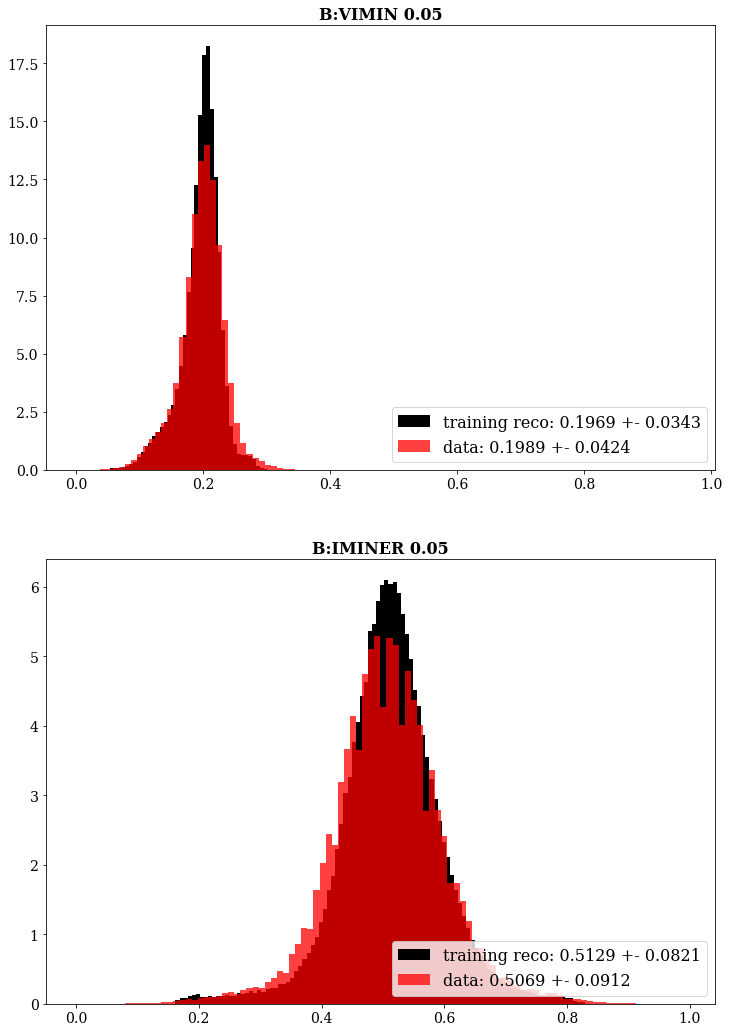

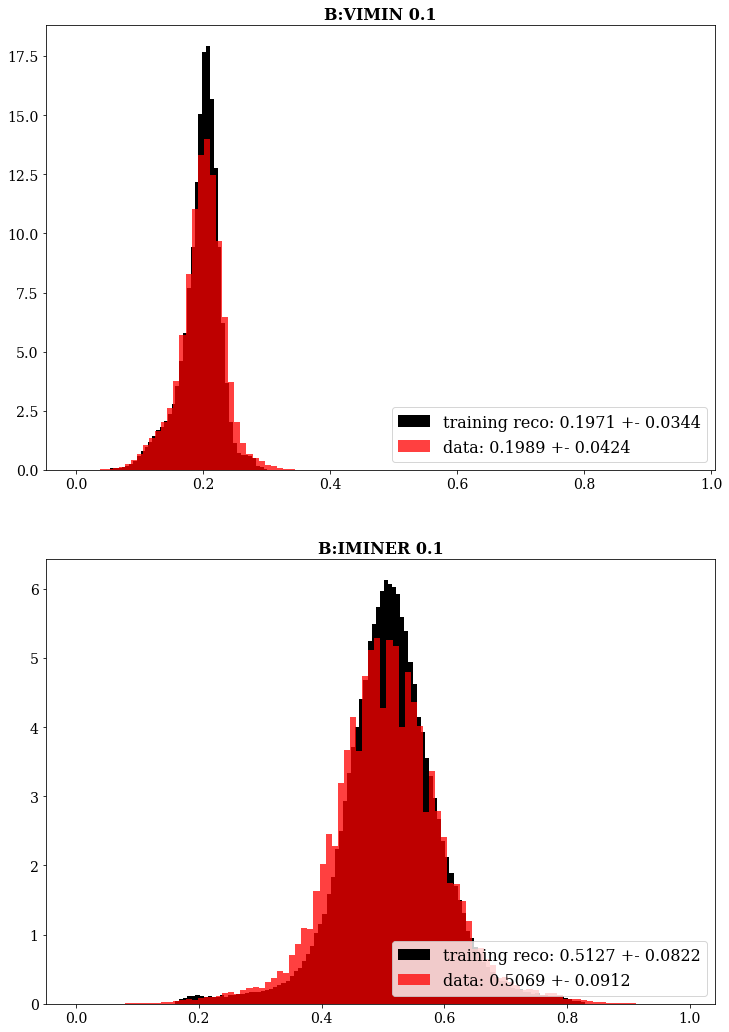

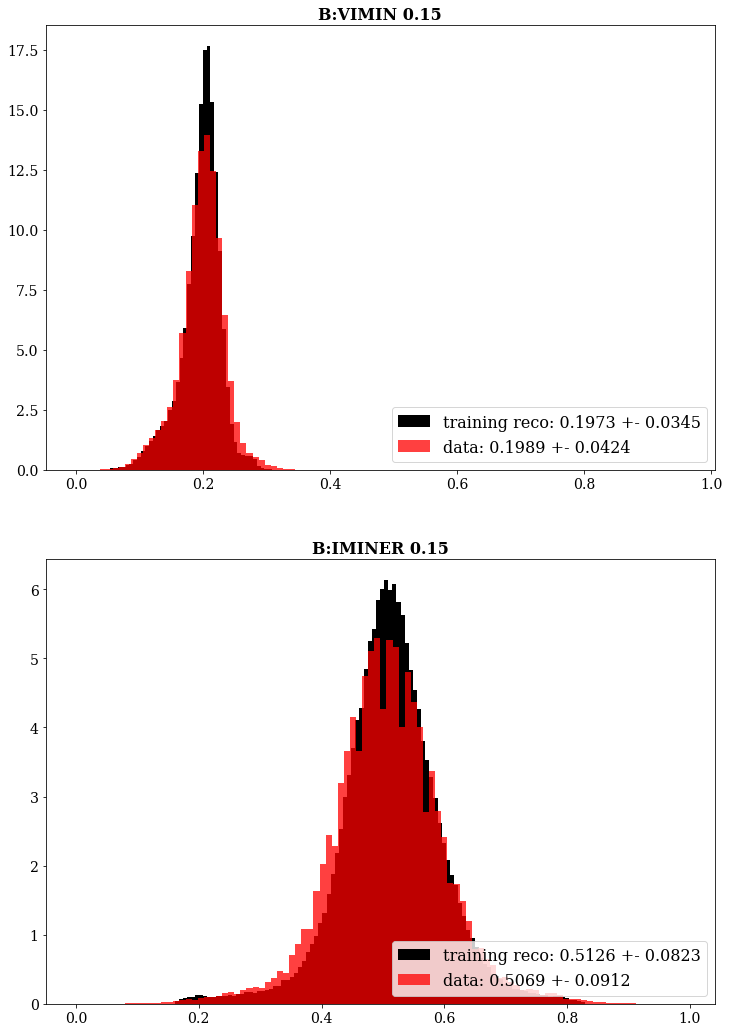

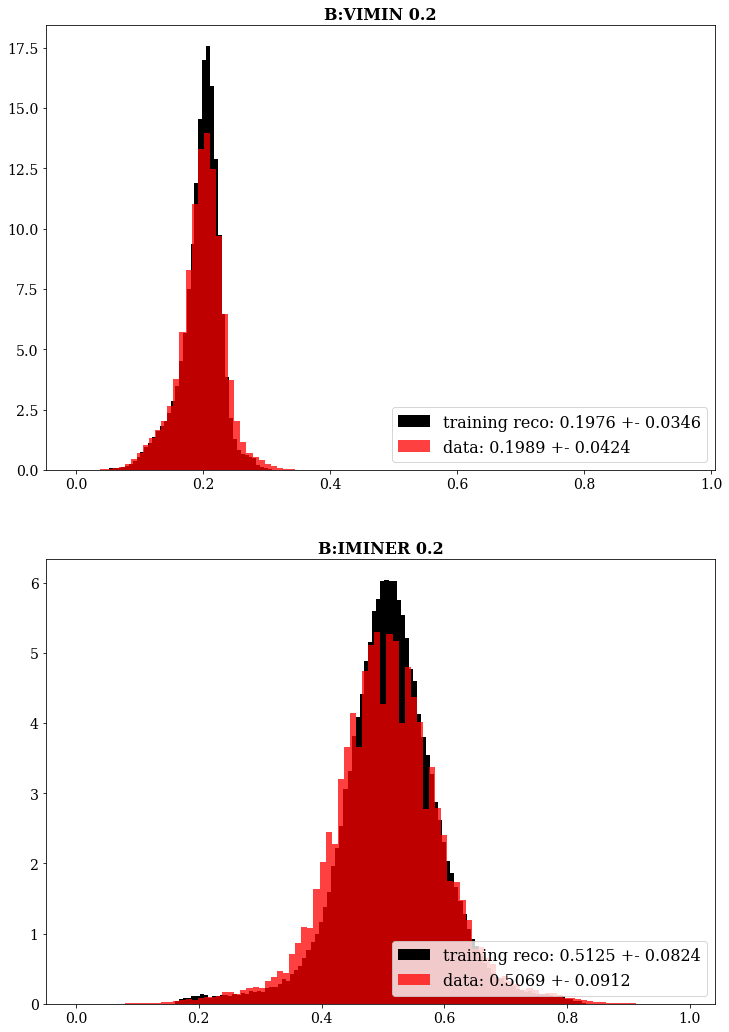

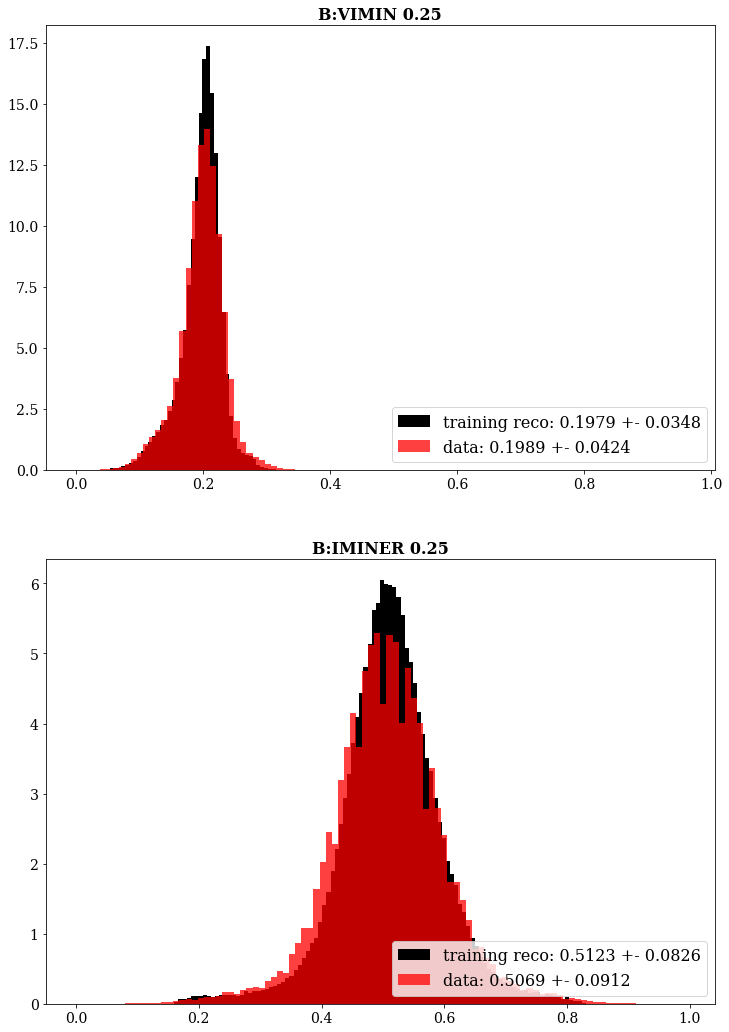

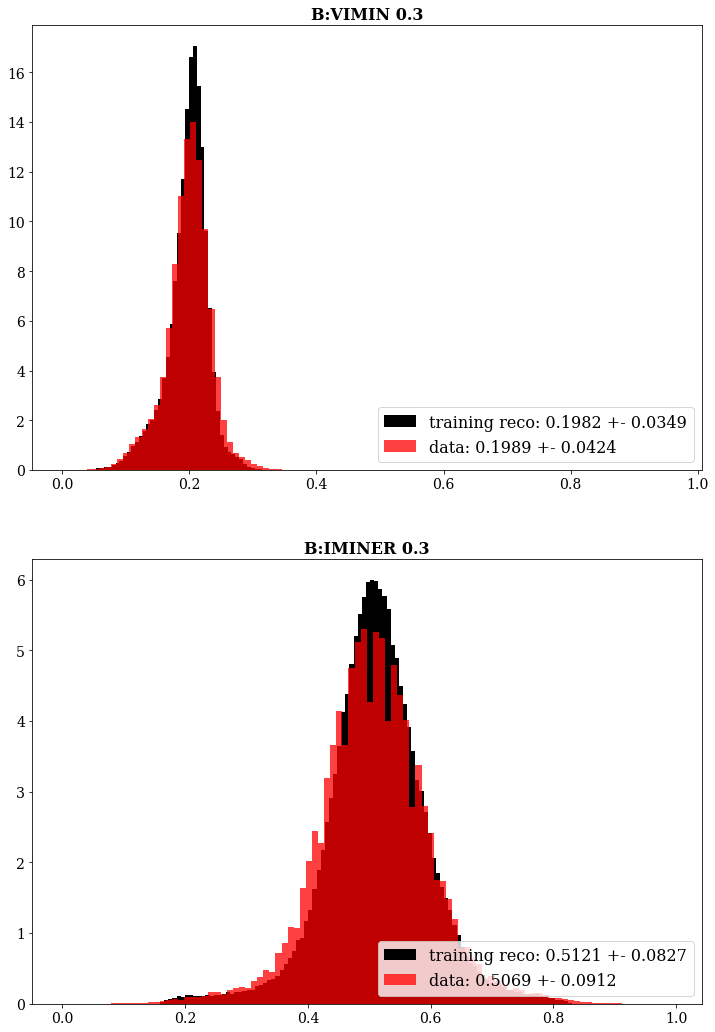

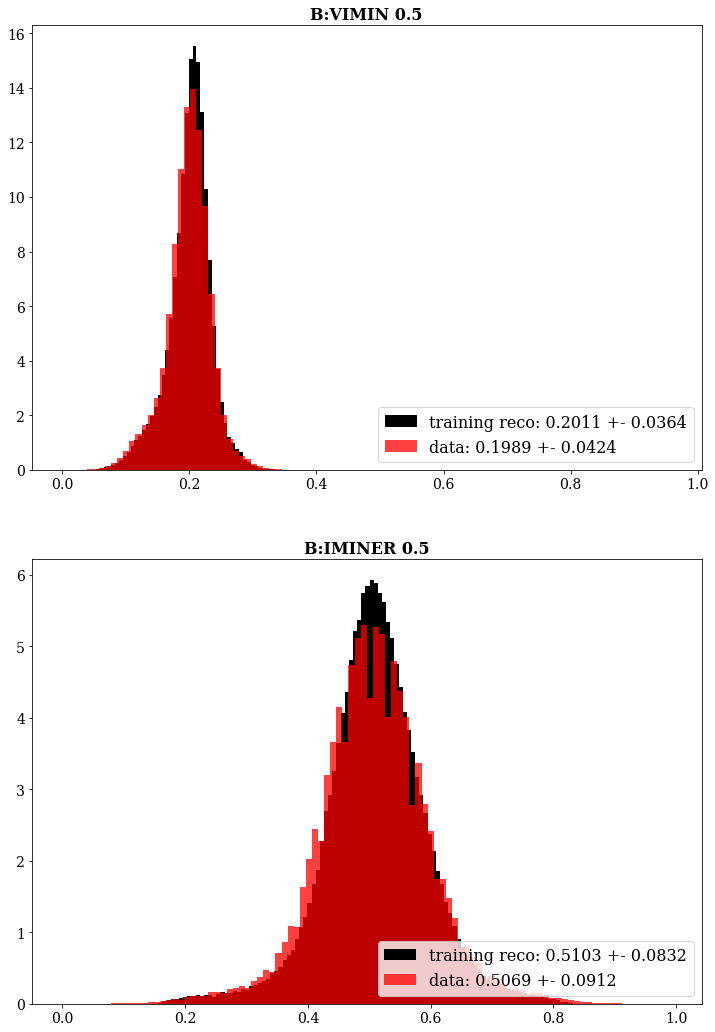

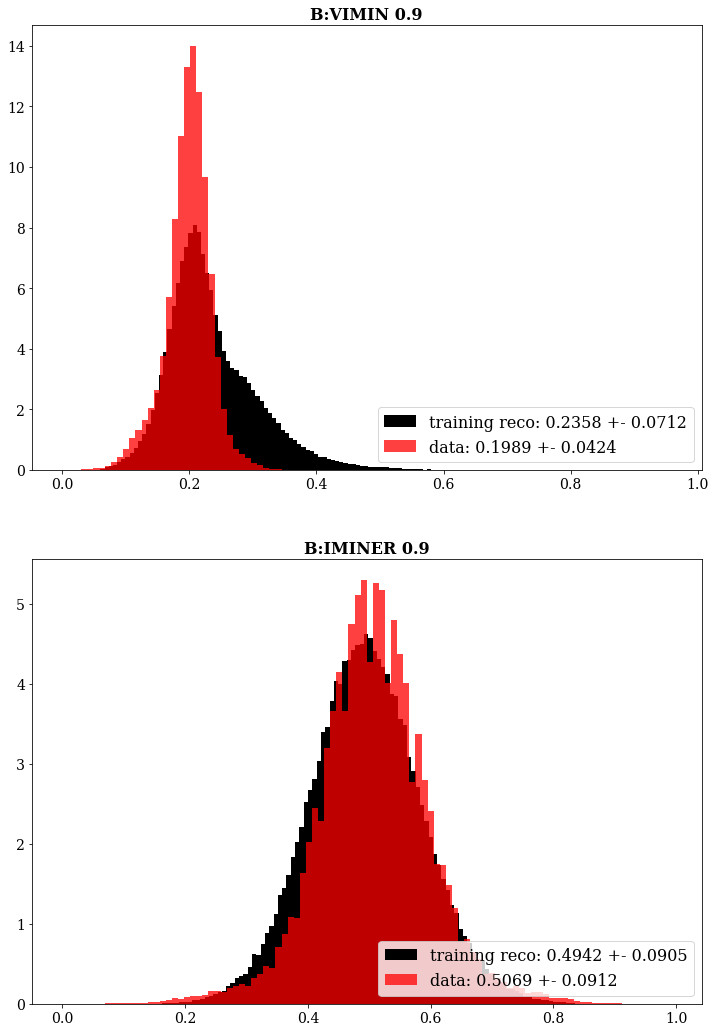

In [0]:
#FOR 25 EPOCH MODEL

# in_shape = (6, 15)
# out_shape = 2
# model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)
# model.load_weights("/dbfs/FileStore/models/D02182021-T201806/fullbooster_noshift_e2_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02182021-T201806_kfold4__final.h5")
#10 epoch model ^^^

dropout = [0.05, 0.1, 0.15, 0.2, 0.25, .3, .5, .9]

for do in dropout:
  calibrate(model, do)

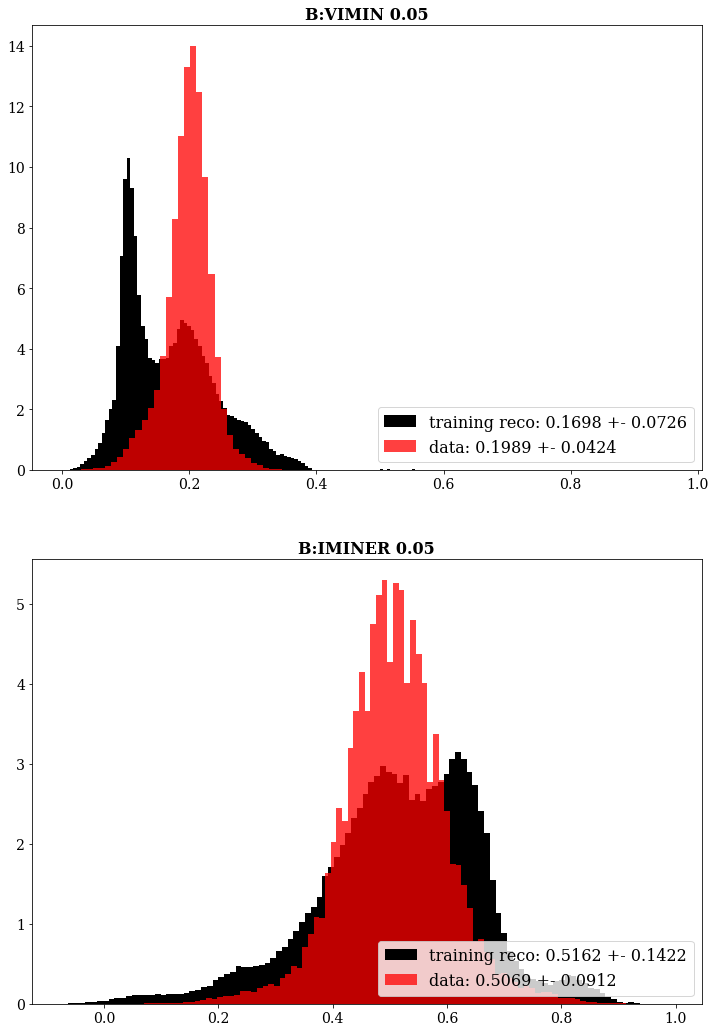

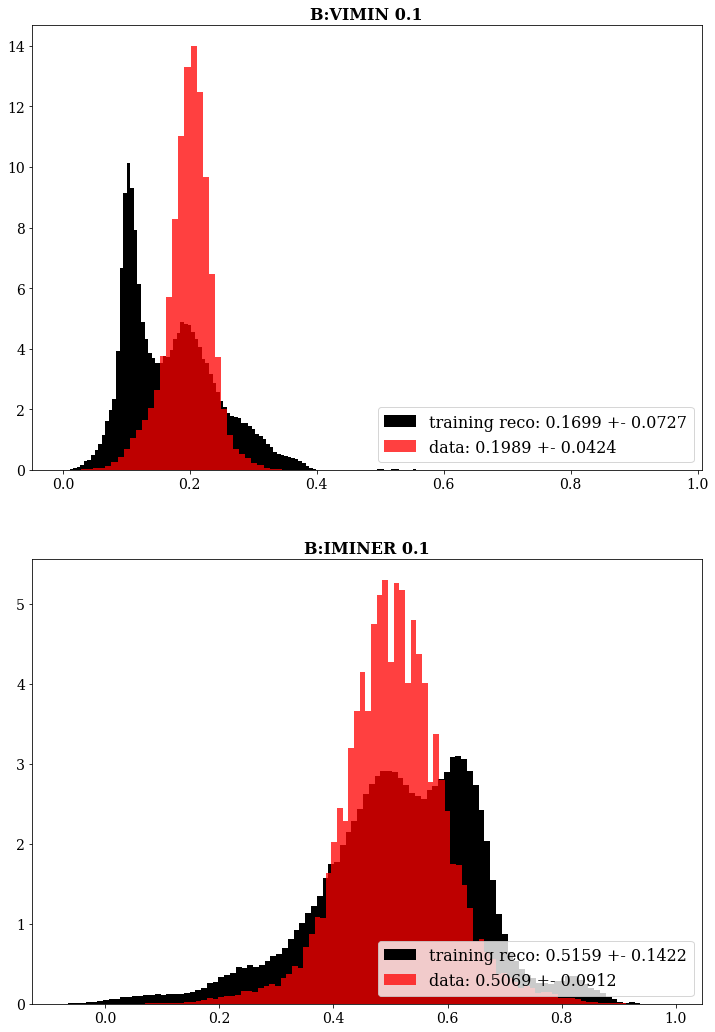

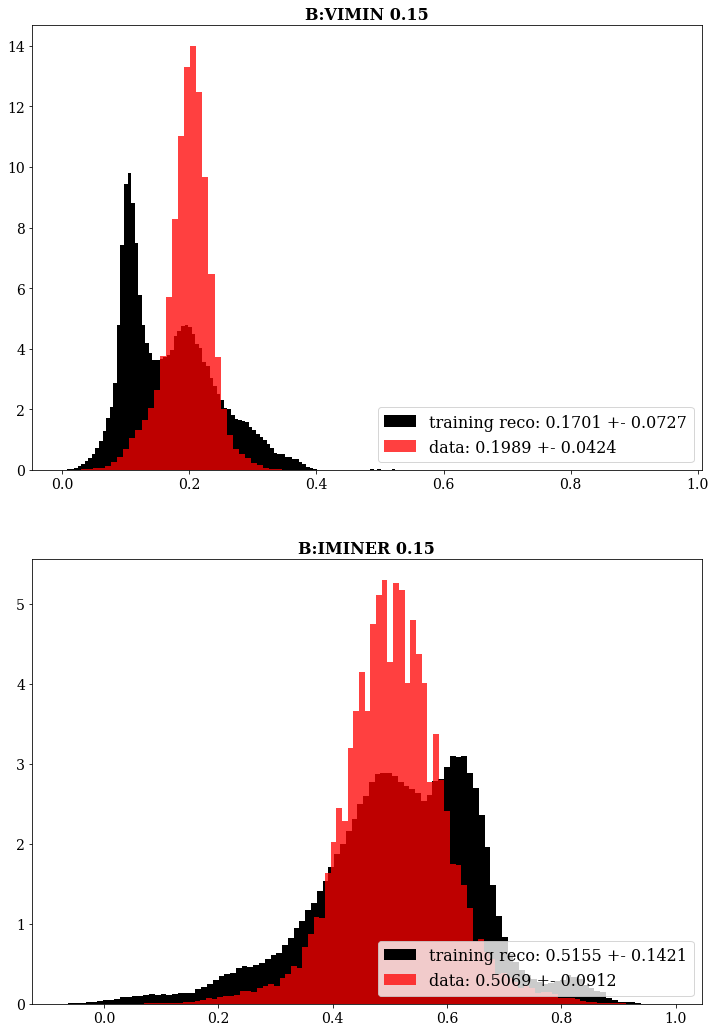

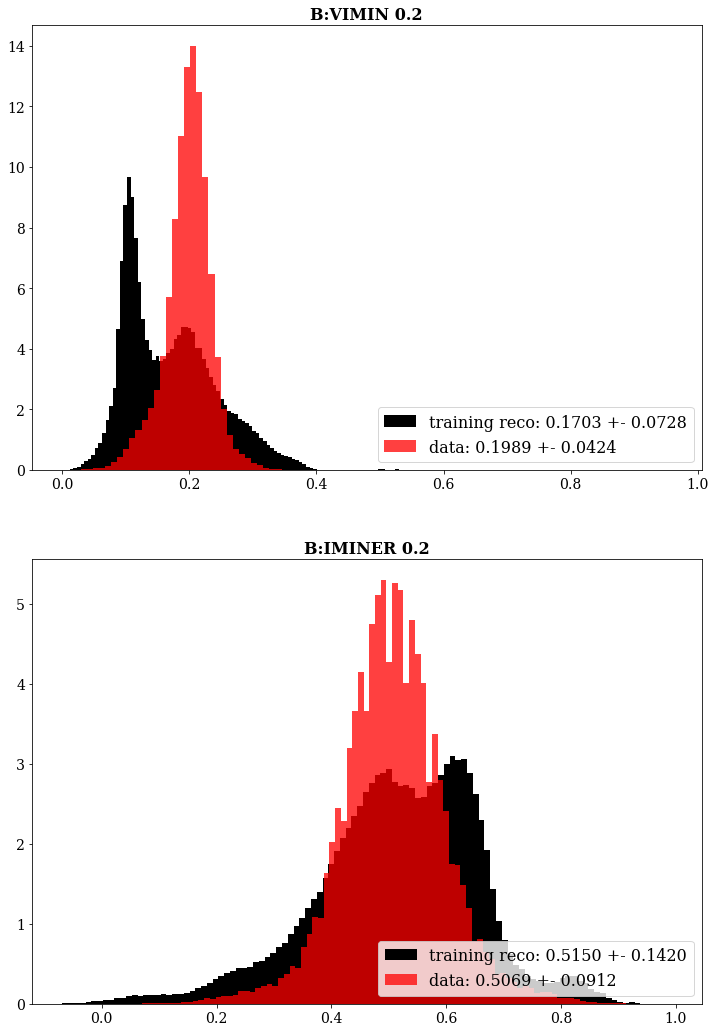

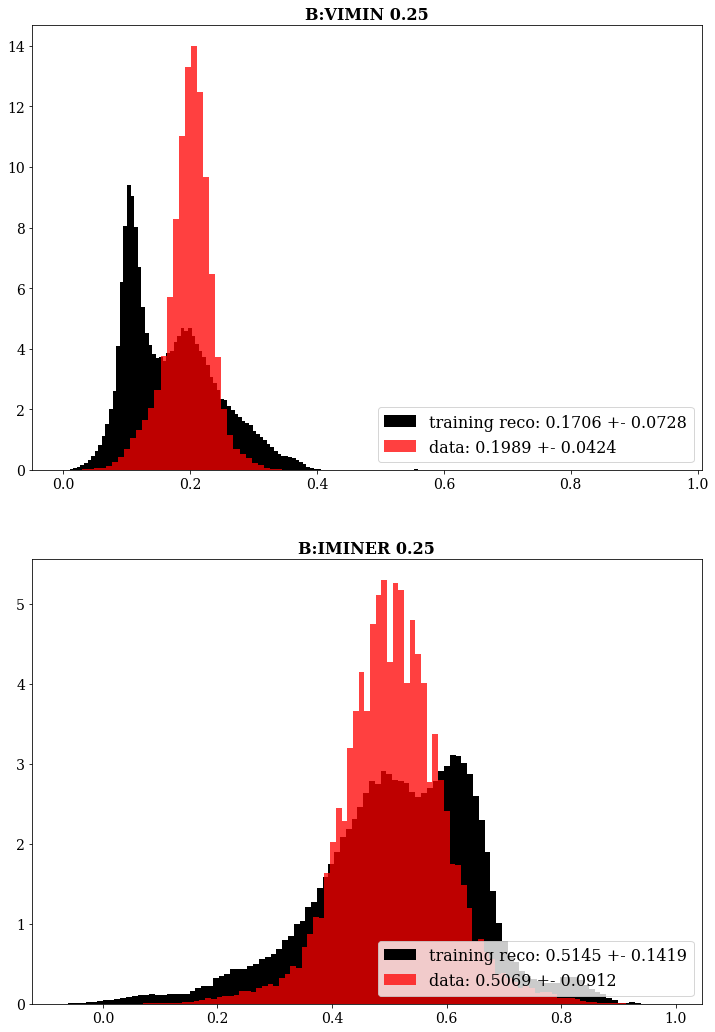

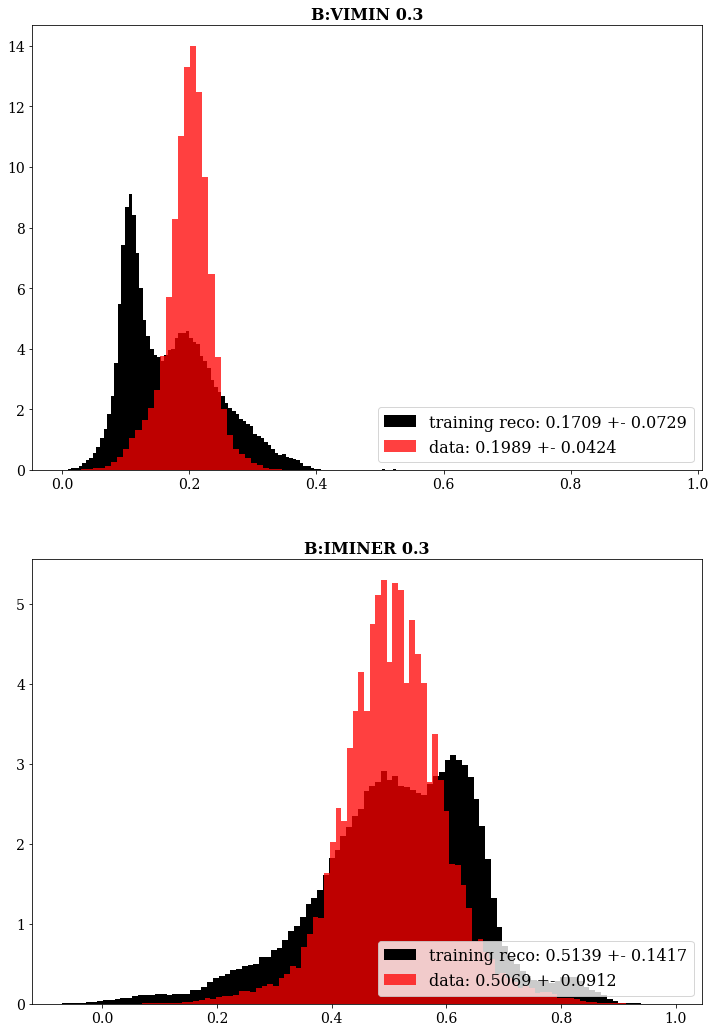

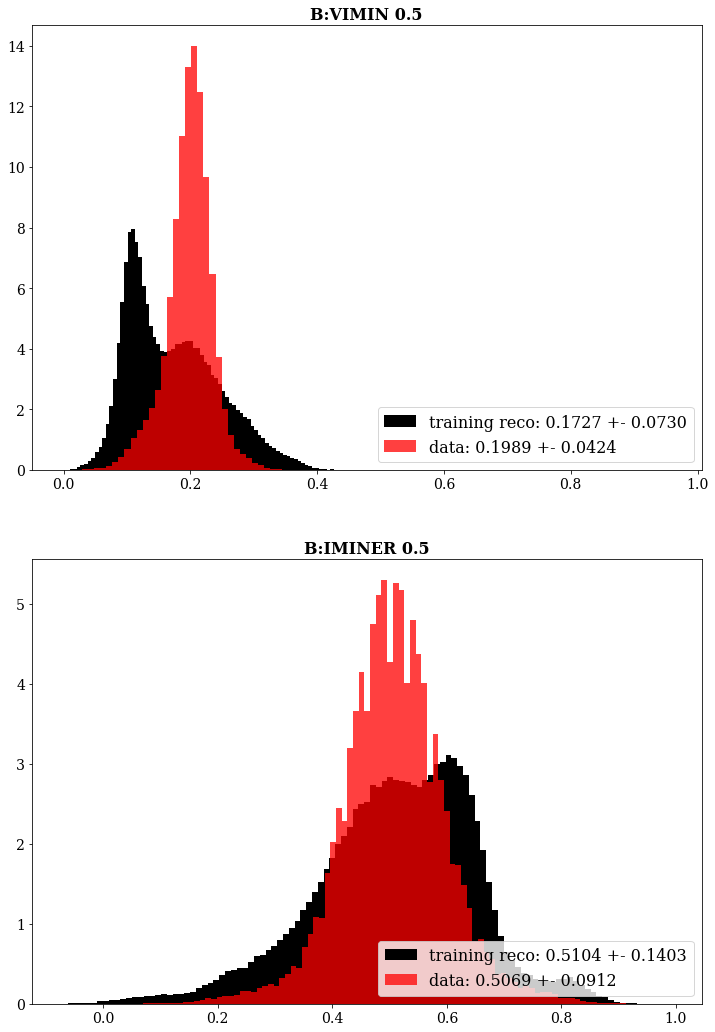

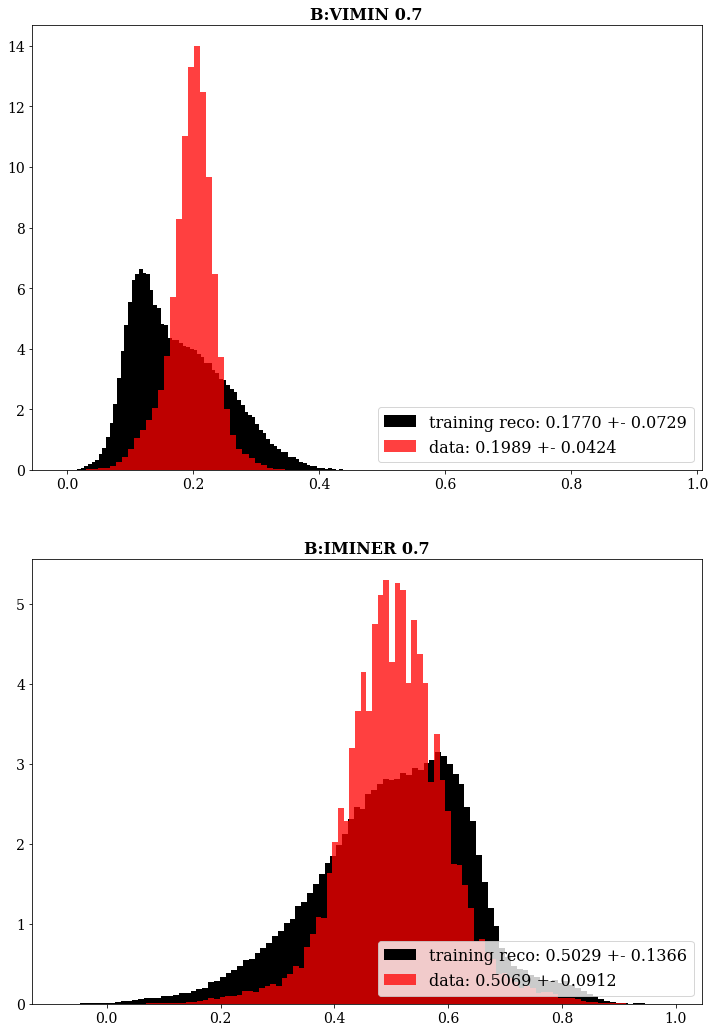

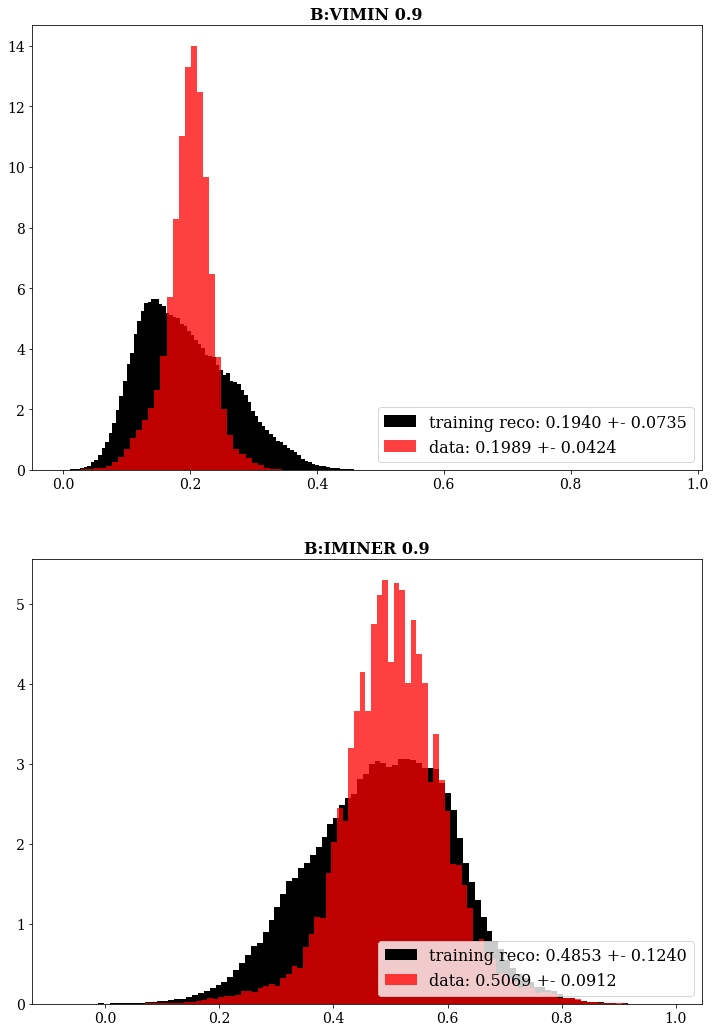

In [0]:
#FOR FULLY TRAINED BEST MODEL (saved as such at least)

in_shape = (6, 15)
out_shape = 2
model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)
model.load_weights("/dbfs/FileStore/models/D02172021-T021454/best_model.h5")

dropout = [0.05, 0.1, 0.15, 0.2, 0.25, .3, .5, .7, .9]

for do in dropout:
  calibrate(model, do)

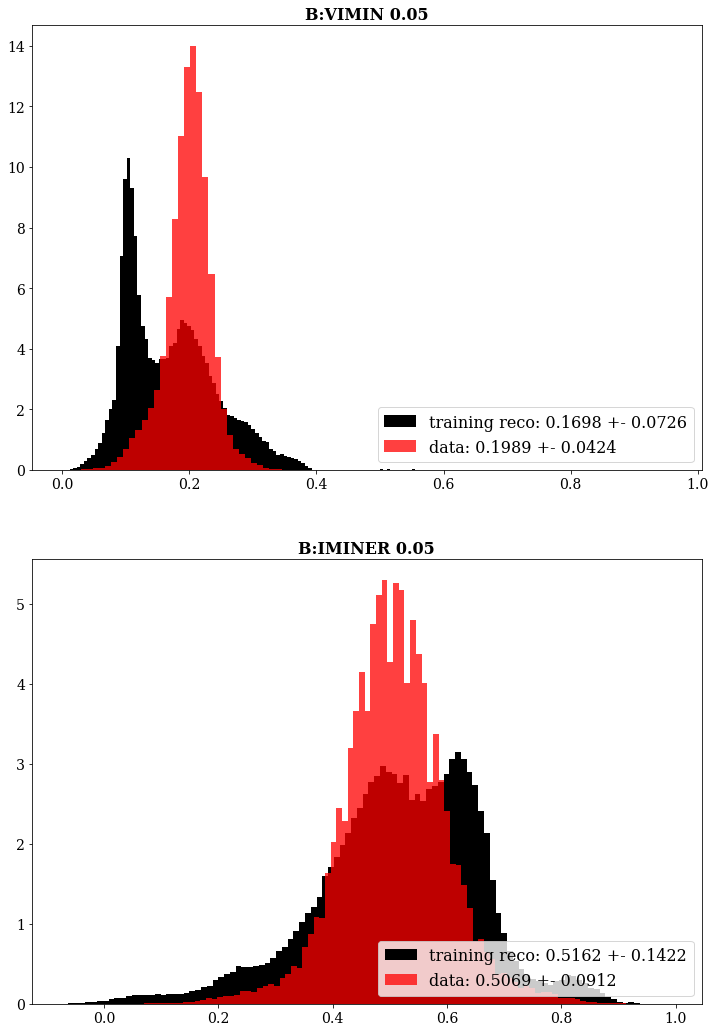

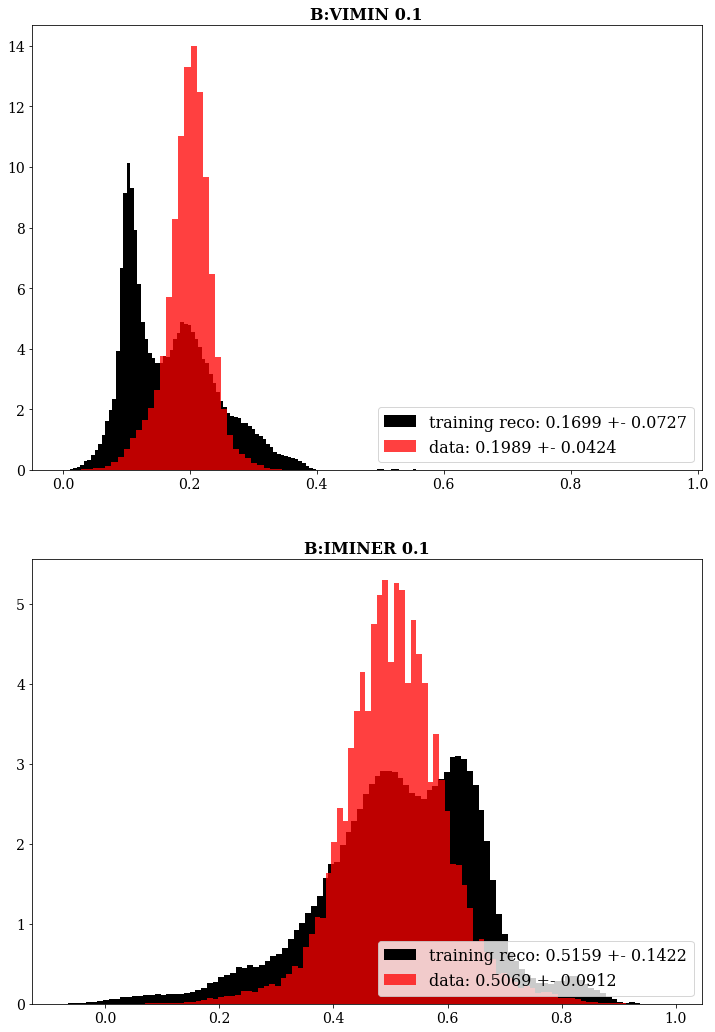

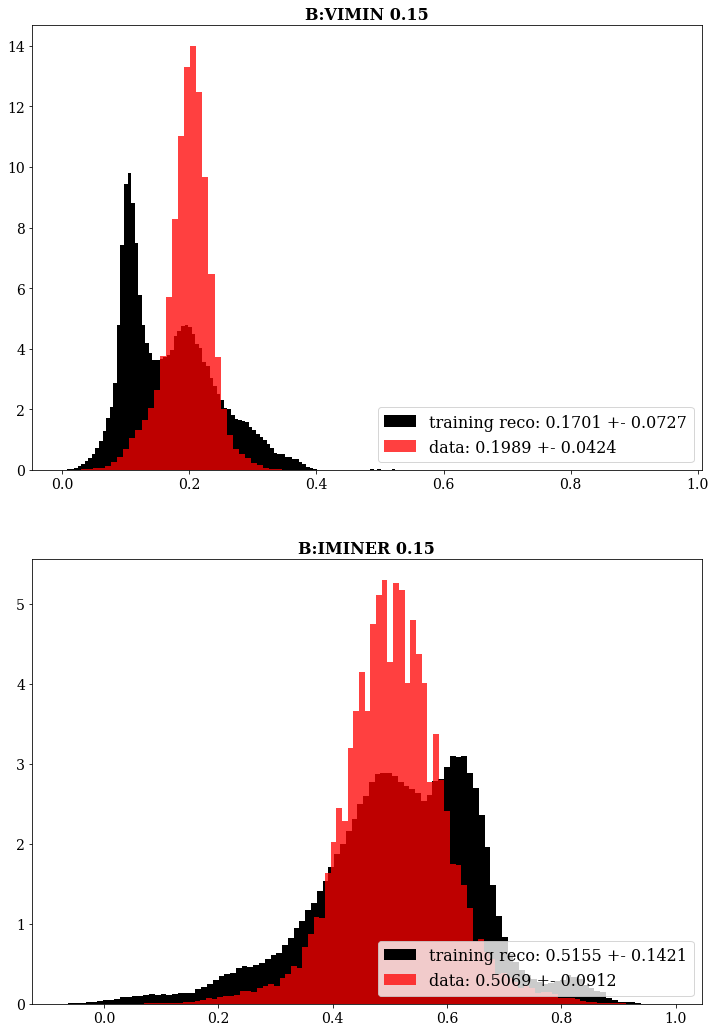

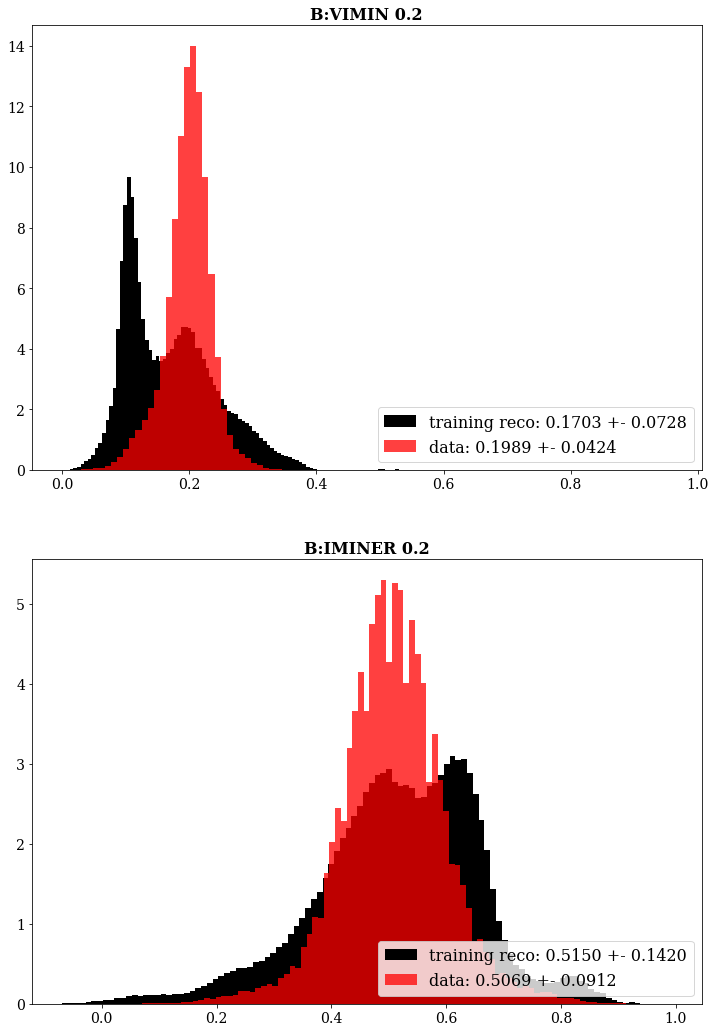

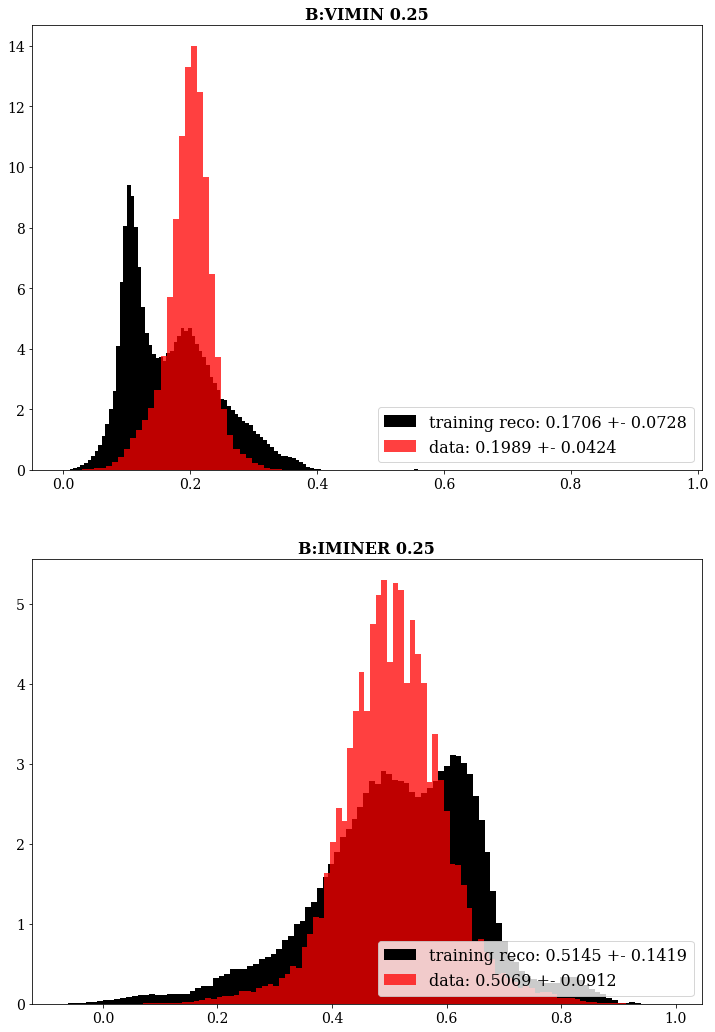

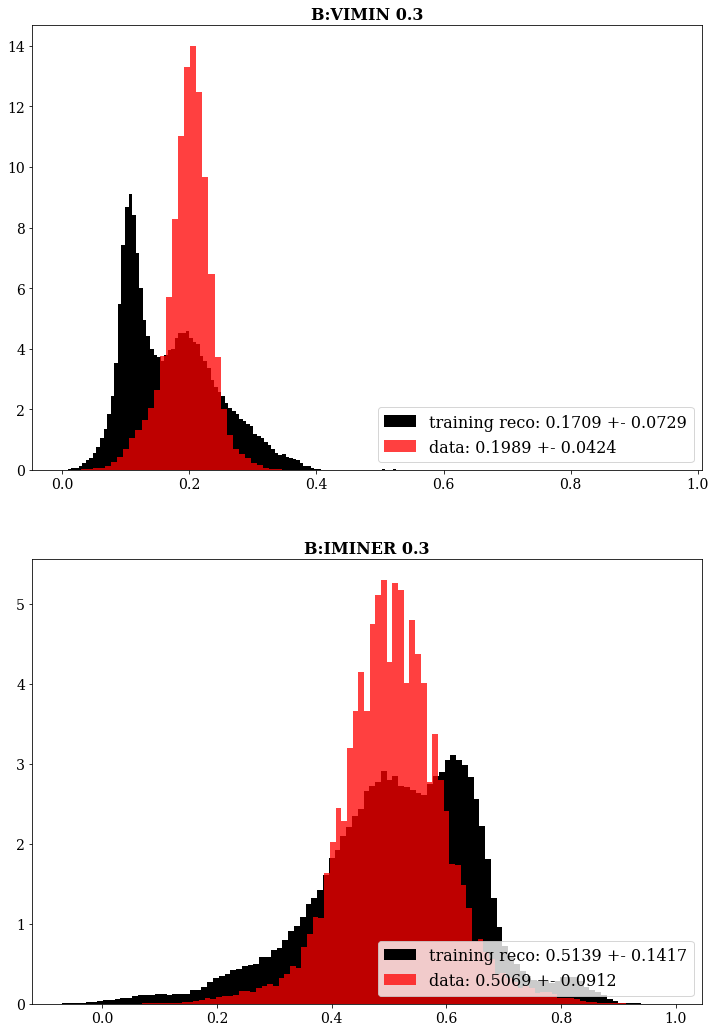

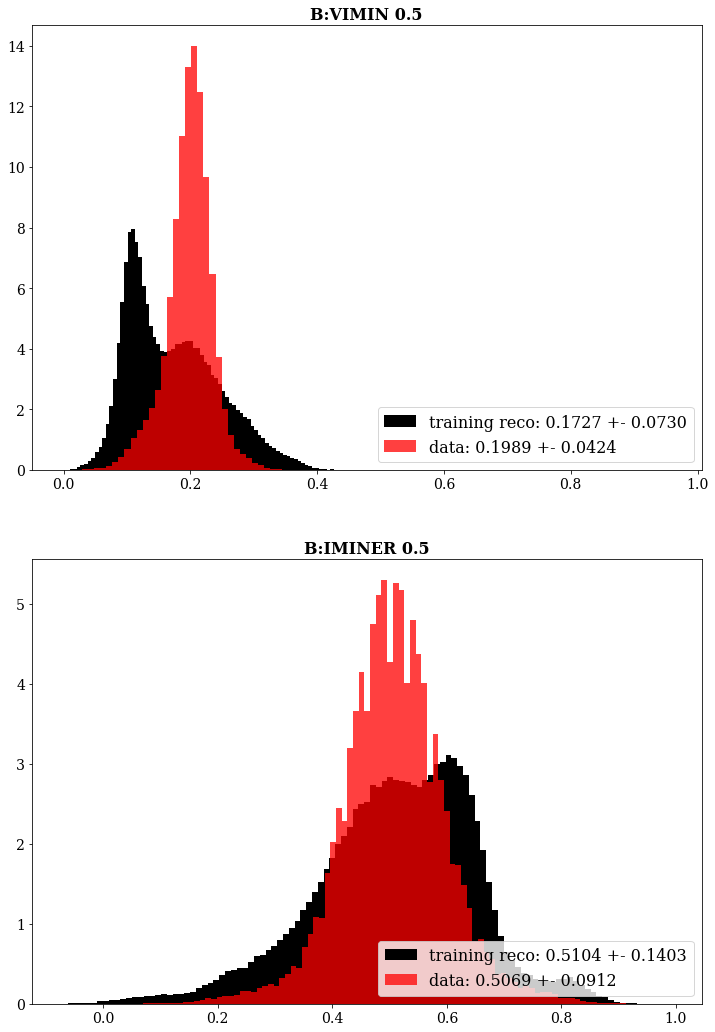

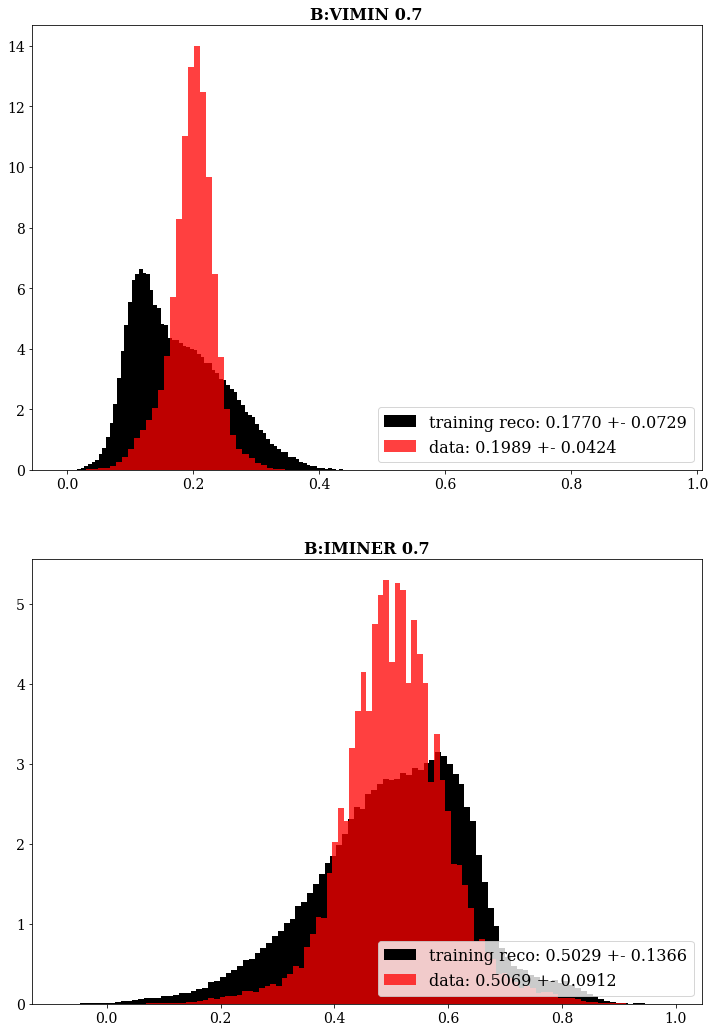

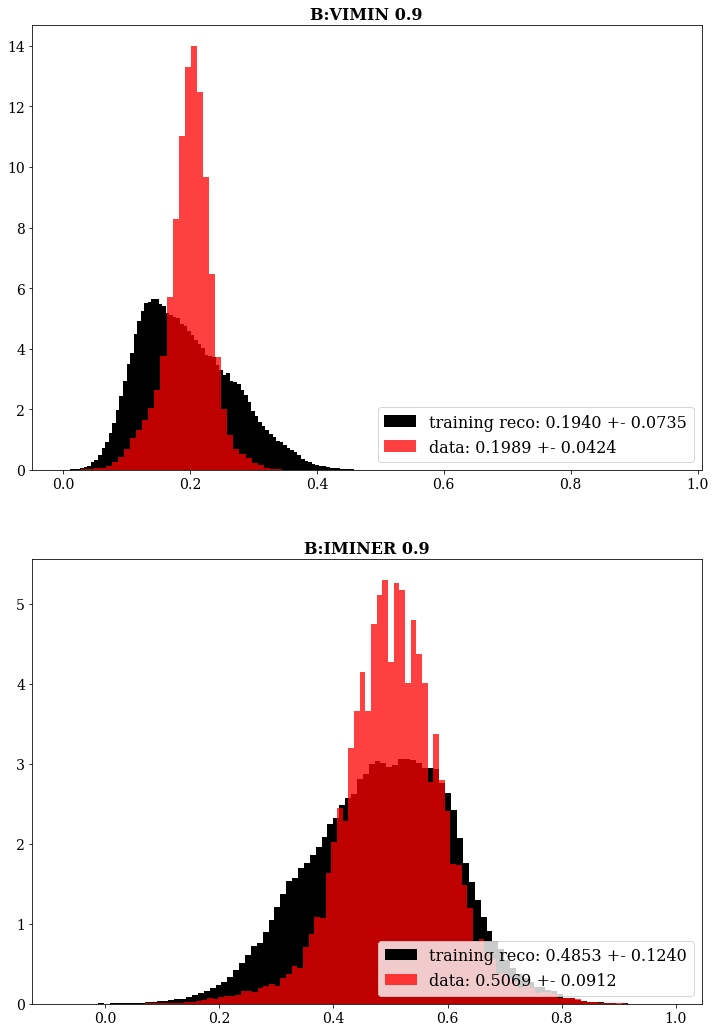

In [0]:
#FOR FULLY TRAINED TERMINAL MODEL

in_shape = (6, 15)
out_shape = 2
model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)
model.load_weights("/dbfs/FileStore/models/D02172021-T021454/fullbooster_noshift_e1_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D02172021-T021454_kfold4__final.h5")

dropout = [0.05, 0.1, 0.15, 0.2, 0.25, .3, .5, .7, .9]

for do in dropout:
  calibrate(model, do)

In [0]:
import numpy as np
from keras.models import load_model

dropout = 0.3
num_iter = 50
num_samples = X_train.shape[0]

dmodel = create_dropout_predict_model(model,dropout)
dconf = dmodel.get_config()
input_test = X_train[0]
print(input_test.shape)
predictions = []

for i in range(num_iter):
    np.random.seed(i)
    tf.random.set_seed(i)
    predictions.append(dmodel(input_test))
    plt.plot(dmodel(input_test)[0])

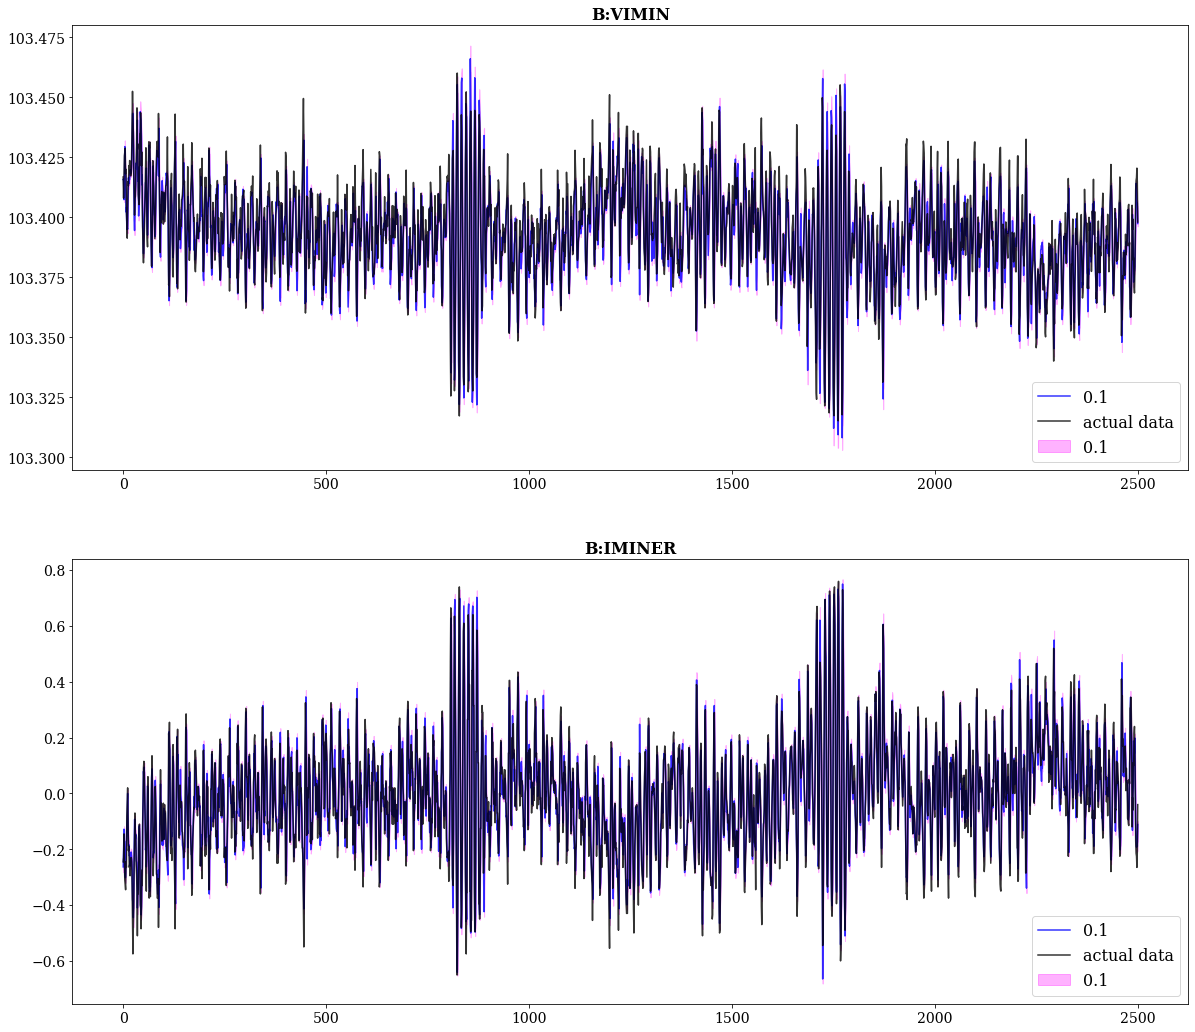

In [0]:
import numpy as np
from keras.models import load_model

dropout = [.1]
choice1 = ['blue', 'green', 'blue']
choice2 = ['magenta', 'yellow', 'tab:purple']

sliced = 2500
num_iter = 50
input_test = X_train[:sliced].reshape(-1,6,15)

#num_samples = X_train.shape[0]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 18))
ax[0].set_title("B:VIMIN")
ax[1].set_title("B:IMINER")

#print(input_test.shape)
pred_bvimin_mean = []
pred_biminer_mean = []

pred_bvimin_sdev = []
pred_biminer_sdev = []

for j in range(0, len(dropout)):
  #dconf = dmodel.get_config()
  dmodel = create_dropout_predict_model(model, dropout[j])

  #print(input_test.shape)
  pred_bvimin = []
  pred_biminer = []

  for i in range(0, num_iter):
      np.random.seed(i)
      tf.random.set_seed(i)
      result = np.asarray(dmodel(input_test))

      bvimin = unscale('B:VIMIN', result[:, 0], scale_dict)
      biminer = unscale('B:IMINER', result[:, 1], scale_dict)

      pred_bvimin.append(bvimin)
      pred_biminer.append(biminer)
  
  pred_bvimin_mean.append(np.mean(pred_bvimin, axis = 0))
  pred_biminer_mean.append(np.mean(pred_biminer, axis = 0))
  
  pred_bvimin_sdev.append(np.std(pred_bvimin, axis = 0))
  pred_biminer_sdev.append(np.std(pred_biminer, axis = 0))

  ax[0].plot(pred_bvimin_mean[j], color=choice1[j], alpha = .8, label='{}'.format(dropout[j]))
  ax[0].fill_between(np.arange(0, len(pred_bvimin_mean[j])), np.subtract(pred_bvimin_mean[j], pred_bvimin_sdev[j]), np.add(pred_bvimin_mean[j], pred_bvimin_sdev[j]), color=choice2[j], alpha=.3, label = '{}'.format(dropout[j]))

  ax[1].plot(pred_biminer_mean[j], color=choice1[j], alpha = .8, label='{}'.format(dropout[j]))
  ax[1].fill_between(np.arange(0, len(pred_biminer_mean[j])), np.subtract(pred_biminer_mean[j], pred_biminer_sdev[j]), np.add(pred_biminer_mean[j], pred_biminer_sdev[j]), color=choice2[j], alpha=.3, label = '{}'.format(dropout[j]))

ax[0].plot(unscale('B:VIMIN', Y_train[:sliced][:,0], scale_dict), color = 'k', alpha = .8, label = 'actual data')
ax[1].plot(unscale('B:IMINER', Y_train[:sliced][:,1], scale_dict), color = 'k', alpha = .8, label = 'actual data')
ax[0].legend(loc= 'lower right')
ax[1].legend(loc= 'lower right')

# plt.plot(pred_bvimin_mean, color = 'black')
# plt.plot(pred_biminer_mean, color = 'red')
# plt.fill_between(pred_bvimin_mean - pred, upper_lim.reshape(-1), color='yellow', alpha=0.5) 

    
  #loop through samples
  #have mean, +- std for 15 first samples at different dropouts
  

In [0]:
len(np.add(pred_bvimin_mean[j], pred_bvimin_sdev[j]))

Out[64]: 5000

In [0]:
len(pred_bvimin)

Out[51]: 20

In [0]:
bvimin.shape
#taking the mean the wrong way!

Out[43]: (5000,)

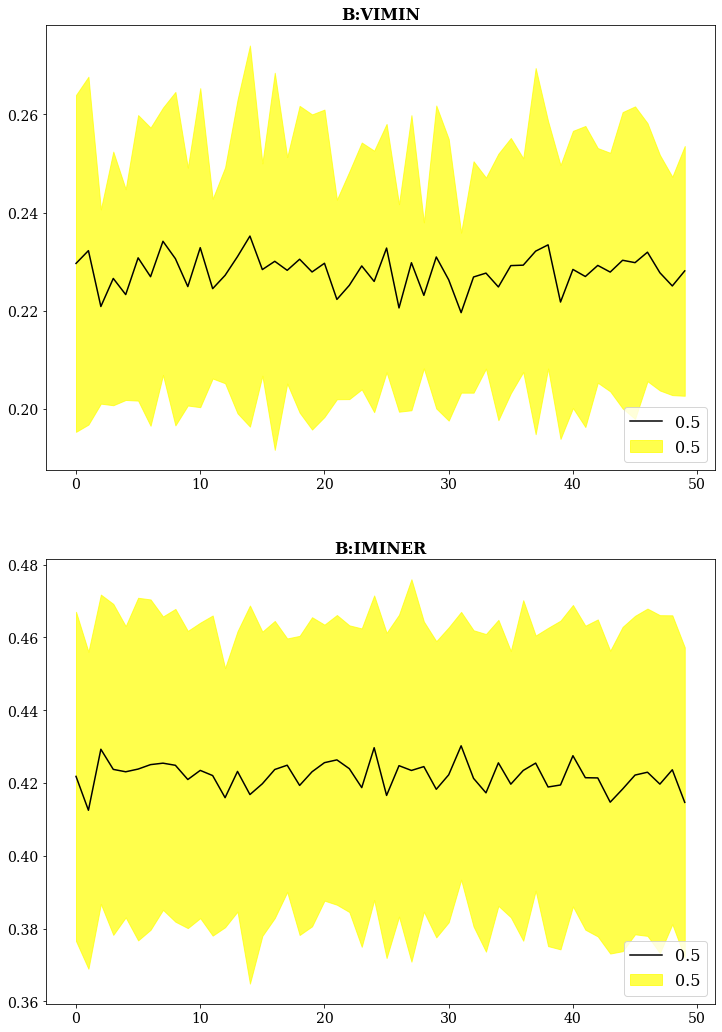

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))

ax[0].set_title("B:VIMIN")
ax[0].plot(pred_bvimin_mean, color='black', label='{}'.format(dropout))
ax[0].fill_between(np.arange(0, 50), np.subtract(pred_bvimin_mean, pred_bvimin_sdev), np.add(pred_bvimin_mean,pred_bvimin_sdev), color='yellow', alpha=0.7, label = '{}'.format(dropout))
ax[0].legend(loc= 'lower right')

ax[1].set_title("B:IMINER")
ax[1].plot(pred_biminer_mean, color='black', label='{}'.format(dropout))
ax[1].fill_between(np.arange(0, 50), np.subtract(pred_biminer_mean, pred_biminer_sdev), np.add(pred_biminer_mean,pred_biminer_sdev), color='yellow', alpha=0.7, label = '{}'.format(dropout))
ax[1].legend(loc= 'lower right')

In [0]:
print(np.subtract(pred_bvimin_mean,pred_bvimin_sdev))
print(np.add(pred_bvimin_mean,pred_bvimin_sdev))

(50,)
[0.26396388 0.26769167 0.24064578 0.25241452 0.24475436 0.25986677
 0.2573136 0.2613911 0.26458547 0.24914731 0.26535553 0.2427996
 0.24919239 0.26297826 0.2740462 0.25001252 0.26849866 0.25130087
 0.26174846 0.26000398 0.26098508 0.24263124 0.24834631 0.25427067
 0.2526074 0.2580664 0.24170558 0.25984275 0.23799911 0.26181862
 0.25499174 0.2359001 0.25044534 0.24712142 0.25199816 0.25519612
 0.25104517 0.2694538 0.2586256 0.2496566 0.25665128 0.257646
 0.25313684 0.25217673 0.26047793 0.26163673 0.25822422 0.25173175
 0.24728698 0.25356454]

In [0]:
a = np.asarray(dmodel(X_train[0:30].reshape(-1,6,15)))
print(a.T)
print(a[:, 0])
print(a[:, 1])

[[0.23106846 0.22072329 0.2214012 0.21942106 0.2649771 0.2469554
 0.22661975 0.2307532 0.20984411 0.19460112 0.22245601 0.19597328
 0.19135901 0.21795505 0.2203494 0.2045594 0.21312533 0.25113758
 0.21717665 0.23153782 0.21390209 0.22474381 0.2229067 0.2257062
 0.25574553 0.26417634 0.22873536 0.2186186 0.19687277 0.1930876 ]
 [0.41260338 0.3955583 0.41491312 0.44826296 0.43214718 0.34269673
 0.4084517 0.40294677 0.47416103 0.45536003 0.46328205 0.5022925
 0.4837513 0.46032286 0.43749884 0.4441674 0.4605203 0.4221014
 0.4385209 0.41028833 0.41676998 0.41764995 0.4128404 0.38698083
 0.36565226 0.27883917 0.38145435 0.40374383 0.44498125 0.49081865]]
[0.23106846 0.22072329 0.2214012 0.21942106 0.2649771 0.2469554
 0.22661975 0.2307532 0.20984411 0.19460112 0.22245601 0.19597328
 0.19135901 0.21795505 0.2203494 0.2045594 0.21312533 0.25113758
 0.21717665 0.23153782 0.21390209 0.22474381 0.2229067 0.2257062
 0.25574553 0.26417634 0.22873536 0.2186186 0.19687277 0.1930876 ]
[0.41260338 0.3955583 0.41491312 0.44826296 0.43214718 0.34269673
 0.4084517 0.40294677 0.47416103 0.45536003 0.46328205 0.5022925
 0.4837513 0.46032286 0.43749884 0.4441674 0.4605203 0.4221014
 0.4385209 0.41028833 0.41676998 0.41764995 0.4128404 0.38698083
 0.36565226 0.27883917 0.38145435 0.40374383 0.44498125 0.49081865]

In [0]:
prediction_bvimin

Out[28]: [0.24117455,
 0.21487258,
 0.24049228,
 0.22177061,
 0.21129093,
 0.21465659,
 0.22288439,
 0.22416365,
 0.22377983,
 0.21697935,
 0.22249071,
 0.22540613,
 0.2068376,
 0.22232169,
 0.25852653,
 0.22314651,
 0.23468648,
 0.22273926,
 0.21406531,
 0.20415604,
 0.21629025,
 0.21878767,
 0.21370073,
 0.22246519,
 0.22307646,
 0.23749802,
 0.2192586,
 0.2194769,
 0.23067778,
 0.22421259,
 0.2273783,
 0.21287659,
 0.22530341,
 0.214656,
 0.21220954,
 0.22809811,
 0.22705725,
 0.22909229,
 0.2170522,
 0.22740343,
 0.22498776,
 0.26059958,
 0.2365401,
 0.23034005,
 0.21744928,
 0.2050064,
 0.20677464,
 0.22114384,
 0.23238799,
 0.22837222]

In [0]:
prediction_biminer

Out[29]: [0.40960044,
 0.4147975,
 0.40573508,
 0.37748796,
 0.416035,
 0.4142825,
 0.42414922,
 0.42506438,
 0.43685412,
 0.40160045,
 0.4115874,
 0.40641513,
 0.4187484,
 0.3984773,
 0.4124112,
 0.39297438,
 0.39070448,
 0.40117586,
 0.41232595,
 0.41232443,
 0.40816742,
 0.408175,
 0.41304767,
 0.38963306,
 0.4118282,
 0.40994668,
 0.41033027,
 0.37910965,
 0.39903283,
 0.37652826,
 0.41317904,
 0.41346258,
 0.42879066,
 0.41363698,
 0.41544494,
 0.41055033,
 0.42748177,
 0.40297872,
 0.39013743,
 0.41129375,
 0.42170298,
 0.3669539,
 0.43339655,
 0.42206046,
 0.39624295,
 0.39453387,
 0.389712,
 0.41449657,
 0.3934936,
 0.39276096]

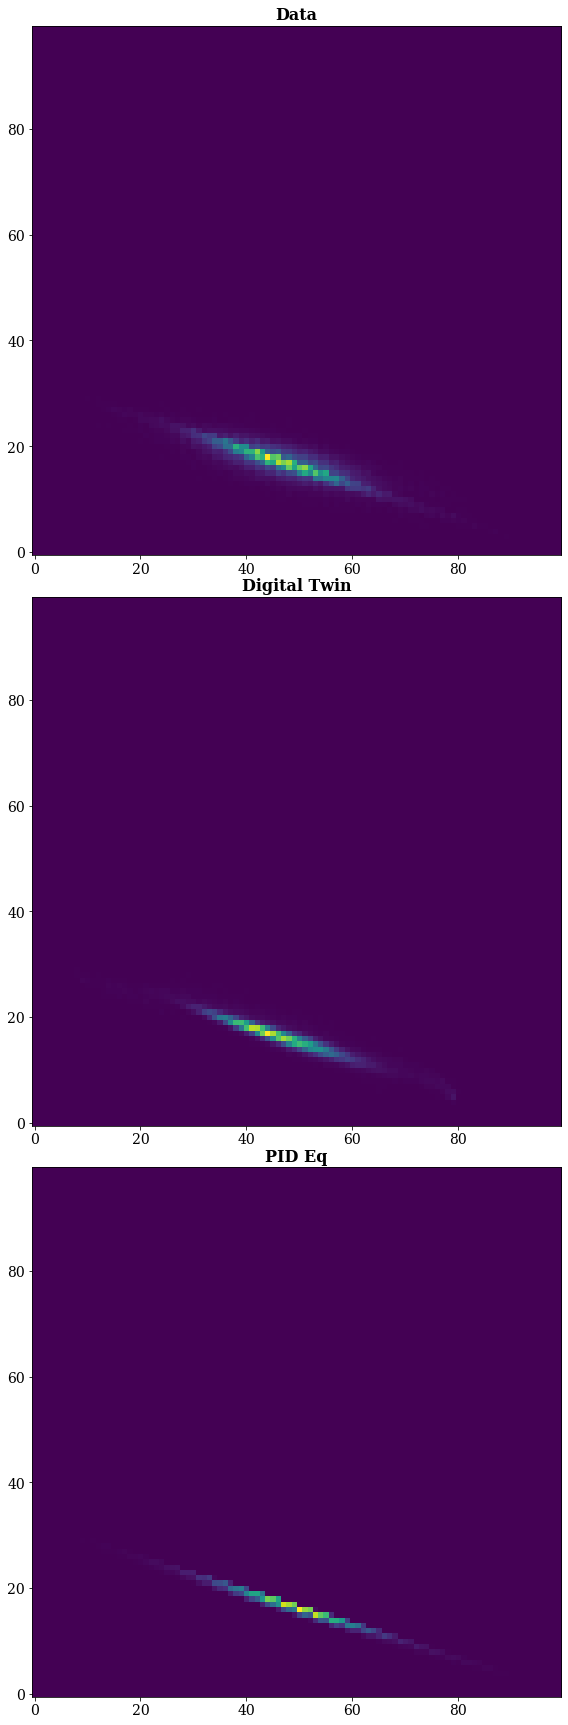

In [0]:
#def data_heatmap(fold, model, BoX_test, BoY_test):

import matplotlib.pyplot as plt
import numpy as np

x_test=BoX_test
y_test=BoY_test
start=0
end=BoX_test.shape[0]
Y_predict = model.predict(x_test[start:end,:,:])
Y_test_var0 = data_list[0][0].inverse_transform(y_test[start:end,0].reshape(-1,1)).reshape(-1,1)
Y_test_var1 = data_list[1][0].inverse_transform(y_test[start:end,1].reshape(-1,1)).reshape(-1,1)

Y_predict_var0 = data_list[0][0].inverse_transform(Y_predict[:,0].reshape(-1,1)).reshape(-1,1)
Y_predict_var1 = data_list[1][0].inverse_transform(Y_predict[:,1].reshape(-1,1)).reshape(-1,1)

x_bvimin = data_list[0][0].inverse_transform(x_test[start:end,0,-1].reshape(-1,1)).reshape(-1,1) # data B:VIMIN
x_biminer = data_list[1][0].inverse_transform(x_test[start:end,1,-1].reshape(-1,1)).reshape(-1,1) # data B:IMINER
x_b_vimin = data_list[2][0].inverse_transform(x_test[start:end,2,-1].reshape(-1,1)).reshape(-1,1) # data B_VIMIN

#Rachael's Eq
alpha = 10e-2
gamma = 7.535e-5
beta=[0]
for i in range(len(x_b_vimin)):
    if i>0:
        beta_t = beta[-1] + gamma*x_biminer[i]
        beta.append(beta_t[0])

#   print(x_b_vimin.shape)
#   print(x_biminer.shape)
#   print(np.asarray(beta).reshape(-1,1).shape)

beta = np.asarray(beta).reshape(-1,1)
BVIMIN_rach = x_b_vimin -1*alpha*x_biminer -1*beta #predict the next, shiftting happens in the plotting
BIMINER_rach = 10*np.add(x_b_vimin, -1*BVIMIN_rach)

#   print(BVIMIN_rach)

#print(Y_test_var0)
#print(BIMINER_rach)

predicted = np.concatenate((Y_test_var0,Y_test_var1,Y_predict_var0,Y_predict_var1, BVIMIN_rach, BIMINER_rach),axis=concate_axis)
df_cool = pd.DataFrame(predicted,columns=['data B:VIMIN','data B:IMINER','pred B:VIMIN','pred B:IMINER', 'rach B:VIMIN', 'rach B:IMINER'])

#df_cool.head(10)
# #x is B:VIMIN
# #y is B:IMINER

# # Generate some test data
x = np.asarray(df_cool['data B:VIMIN'])
y = np.asarray(df_cool['data B:IMINER'])
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, density=True, range = [[min(x), max(x)], [min(y), max(y)]])

print(xedges, yedges)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# #print(extent)

x2 = np.asarray(df_cool['pred B:VIMIN'])
y2 = np.asarray(df_cool['pred B:IMINER'])
#   print(x2.shape)
#   print(y2.shape)
heatmap2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=100, density=True, range = [[min(x), max(x)], [min(y), max(y)]])
# #extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]

print(xedges2, yedges2)
# #print(extent2)

x3 = np.asarray(df_cool['rach B:VIMIN']) #.reshape(-1, )
y3 = np.asarray(df_cool['rach B:IMINER']) #.reshape(-1, )
#   print(x3.shape)
#   print(y3.shape)
heatmap3, xedges3, yedges3 = np.histogram2d(x3, y3, bins=100, density=True, range = [[min(x), max(x)], [min(y), max(y)]])
#extent3 = [xedges3[0], xedges3[-1], yedges3[0], yedges3[-1]]

print(xedges3, yedges3)
#extent = [min(x), max(x)]

#sns.scatterplot(data=df_cool, x="data B:VIMIN", y="data B:IMINER", label='Data') #, hue="time")

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 24))
fig.tight_layout()
ax[0].set_title('Data')
ax[0].imshow(heatmap, origin='lower')
ax[1].set_title('Digital Twin')
ax[1].imshow(heatmap2, origin='lower')
ax[2].set_title('PID Eq')
ax[2].imshow(heatmap3, origin='lower')
#fig.subplots_adjust(hspace=-.05)

plt.savefig("heatmap_{}.png".format(fold))
mlflow.log_artifact("heatmap_{}.png".format(fold))
#   plt.show()

#need to add colorbars too

In [0]:
df_cool.min()

Out[51]: data B:VIMIN 103.278419
data B:IMINER -1.065313
pred B:VIMIN 103.304489
pred B:IMINER -0.904642
rach B:VIMIN 103.279780
rach B:IMINER -1.039725
dtype: float64

In [0]:
# #def train_surrogate(data, x_train, y_train, x_val, y_val):
# import seaborn as sns
# e=1 #1
# bs=32 #was 99
# in_shape=(len(variables), 15) #150)
# out_shape= 2 #4
# if concate_axis==2:
#     in_shape=(1,len(variables)*15) #150)
# booster_model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)

a = data_heatmap(1, model, BoX_test, BoY_test)
print(a)

In [0]:
# def data_distribution_plot(fold, model, BoX_test, BoY_test):
import seaborn as sns
fig, axs = plt.subplots(1,figsize=(12,12))
x_test=BoX_test
y_test=BoY_test
start=0
end=BoX_test.shape[0]
Y_predict = model.predict(x_test[start:end,:,:])
Y_test_var0 = data_list[0][0].inverse_transform(y_test[start:end,0].reshape(-1,1)).reshape(-1,1)
Y_test_var1 = data_list[1][0].inverse_transform(y_test[start:end,1].reshape(-1,1)).reshape(-1,1)

Y_predict_var0 = data_list[0][0].inverse_transform(Y_predict[:,0].reshape(-1,1)).reshape(-1,1)
Y_predict_var1 = data_list[1][0].inverse_transform(Y_predict[:,1].reshape(-1,1)).reshape(-1,1)

x_bvimin = data_list[0][0].inverse_transform(x_test[start:end,0,-1].reshape(-1,1)).reshape(-1,1) # data B:VIMIN
x_biminer = data_list[1][0].inverse_transform(x_test[start:end,1,-1].reshape(-1,1)).reshape(-1,1) # data B:IMINER
x_b_vimin = data_list[2][0].inverse_transform(x_test[start:end,2,-1].reshape(-1,1)).reshape(-1,1) # data B_VIMIN

#Rachael's Eq
alpha = 10e-2
gamma = 7.535e-5
beta=[0]
for i in range(len(x_b_vimin)):
    if i>0:
        beta_t = beta[-1] + gamma*x_biminer[i]
        beta.append(beta_t[0])

#   print(x_b_vimin.shape)
#   print(x_biminer.shape)
#   print(np.asarray(beta).reshape(-1,1).shape)

beta = np.asarray(beta).reshape(-1,1)
BVIMIN_rach = x_b_vimin -1*alpha*x_biminer -1*beta #predict the next, shiftting happens in the plotting
#   print(BVIMIN_rach)

BIMINER_rach = 10*np.add(x_b_vimin, -1*BVIMIN_rach)
#   print(BIMINER_rach)
#   print(x_biminer.shape)
#   print(x_b_vimin.shape)
#   print(BVIMIN_rach.shape)
#   print(BIMINER_rach.shape)

#   BVIMIN_rach = BVIMIN_rach.reshape(BVIMIN_rach.shape[0],1)
#   BIMINER_rach = BIMINER_rach.reshape(BIMINER_rach.shape[0],1)

#   print(Y_test_var0.shape)
#   print(Y_test_var1.shape)
#   print(Y_predict_var0.shape)
#   print(Y_predict_var1.shape)

predicted = np.concatenate((Y_test_var0,Y_test_var1,Y_predict_var0,Y_predict_var1, BVIMIN_rach, BIMINER_rach),axis=concate_axis)
#   print(predicted.shape)
df_cool = pd.DataFrame(predicted,columns=['data B:VIMIN','data B:IMINER','pred B:VIMIN','pred B:IMINER', 'rach B:VIMIN', 'rach B:IMINER'])

df_cool.head(10)
#   print(df_cool.shape)
#sns.pairplot(df_predict)
#np_data = np.concatenate((Y_predict_var0,Y_predict_var1),axis=concate_axis) 
#df_data = pd.DataFrame(np_data)
#sns.pairplot(df_data)
# sns.scatterplot(data=df_cool, x="data B:VIMIN", y="data B:IMINER", label='Data') #, hue="time")
# sns.scatterplot(data=df_cool, x="pred B:VIMIN", y="pred B:IMINER", label='Digital Twin') #, hue="time")
# sns.scatterplot(data=df_cool, x="rach B:VIMIN", y="rach B:IMINER", label="PID Eq")

# #sns.scatterplot(data=df_cool, x="data_va1", y="pred_va1", label='Data')#, hue="time")

# #axs.plot(Y_test_var0,Y_test_var1,'o', label='Data')
# #axs.plot(Y_predict_var0,Y_predict_var1,'*', label='Digital Twin')
# #axs.set_xlabel('B:VIMIN')
# #axs.set_ylabel('B:IMINER')
# #axs.set_xlim(103.2,103.6)

# #plt.savefig('/dbfs/FileStore/models/'+timestamp+'/'+mcp_name+'_corr_final.png')
# plt.savefig("corr_{}.png".format(fold))
# mlflow.log_artifact("corr_{}.png".format(fold))

#plt.legend()

data B:VIMIN 
 data B:IMINER 
 pred B:VIMIN 
 pred B:IMINER 
 rach B:VIMIN 
 rach B:IMINER 
 
 
 
 
 0 
 103.396980 
 0.004687 
 103.397697 
 -0.001224 
 103.401688 
 -0.050278 
 
 
 1 
 103.388634 
 0.074687 
 103.385468 
 0.120663 
 103.396194 
 0.004657 
 
 
 2 
 103.389786 
 0.064687 
 103.378517 
 0.198972 
 103.389185 
 0.074752 
 
 
 3 
 103.372162 
 0.244687 
 103.376289 
 0.162477 
 103.390179 
 0.064806 
 
 
 4 
 103.371887 
 0.244687 
 103.362328 
 0.315212 
 103.372163 
 0.244968 
 
 
 5 
 103.370026 
 0.259688 
 103.371834 
 0.258845 
 103.372145 
 0.245152 
 
 
 6 
 103.378868 
 0.179687 
 103.370972 
 0.226421 
 103.370622 
 0.260378 
 
 
 7 
 103.390938 
 0.054688 
 103.382500 
 0.108826 
 103.378612 
 0.180481 
 
 
 8 
 103.396011 
 0.009688 
 103.393982 
 0.021697 
 103.391105 
 0.055552 
 
 
 9 
 103.392517 
 0.049687 
 103.394684 
 0.037635 
 103.395605 
 0.010546

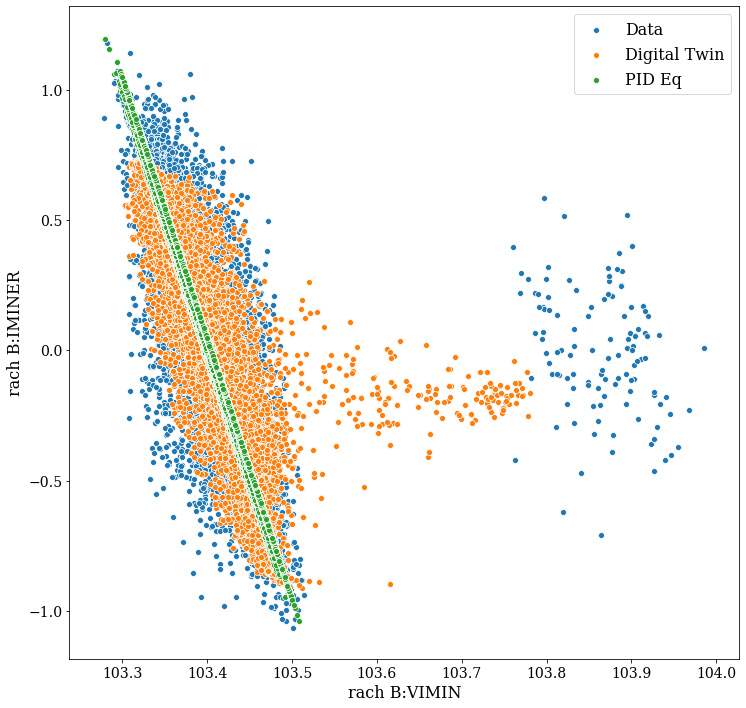

In [0]:
b = data_distribution_plot(1, model, BoX_test, BoY_test)

In [0]:
a

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1344948476291558> in <module> 
 ----> 1 a

 NameError : name 'a' is not defined